<a href="https://colab.research.google.com/github/jyotissh/ASD_Prediction_ensemble_model/blob/main/ASD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Predicting the possibility of Autism Spectrum Disorder (ASD) among adults using an ensemble machine learning classification model**



#Import libraries


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Import datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the uploaded file to inspect its structure and content
abide2 = '/content/drive/MyDrive/dataset/ABIDEII_Composite_Phenotypic(1).csv'
abide1 = '/content/drive/MyDrive/dataset/Phenotypic_V1_0b.csv'
abide2_data = pd.read_csv(abide2, encoding='latin-1') # Changed encoding to 'latin-1'
abide1_data = pd.read_csv(abide1, encoding='latin-1') # Changed encoding to 'latin-1'

#Show a glimpse of both the datasets

In [ ]:
abide1_data.head()

,SITE_ID,SUB_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,...,WISC_IV_BLK_DSN_SCALED,WISC_IV_PIC_CON_SCALED,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI
0,CALTECH,51456,1,4,55.4,1,R,NaN,126.0,118.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
1,CALTECH,51457,1,4,22.9,1,Ambi,NaN,107.0,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
2,CALTECH,51458,1,1,39.2,1,R,NaN,93.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
3,CALTECH,51459,1,1,22.8,1,R,NaN,106.0,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
4,CALTECH,51460,1,1,34.6,2,Ambi,NaN,133.0,135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN


In [ ]:
abide2_data.head()

,SITE_ID,SUB_ID,NDAR_GUID,DX_GROUP,PDD_DSM_IV_TR,ASD_DSM_5,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,...,ADI_R_C3_TOTAL,ADI_R_C4_REPETITIVE_USE_OBJECTS,ADI_R_C4_HIGHER,ADI_R_C4_UNUSUAL_SENSORY_INTERESTS,ADI_R_C4_TOTAL,ADI_R_D_AGE_PARENT_NOTICED,ADI_R_D_AGE_FIRST_SINGLE_WORDS,ADI_R_D_AGE_FIRST_PHRASES,ADI_R_D_AGE_WHEN_ABNORMALITY,ADI_R_D_INTERVIEWER_JUDGMENT
0,ABIDEII-BNI_1,29006,NaN,1,NaN,NaN,48.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABIDEII-BNI_1,29007,NaN,1,NaN,NaN,41.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABIDEII-BNI_1,29008,NaN,1,NaN,NaN,59.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABIDEII-BNI_1,29009,NaN,1,NaN,NaN,57.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABIDEII-BNI_1,29010,NaN,1,NaN,NaN,45.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Modifying a column name

In [ ]:
#modifying the column name in ABIDEII dataset
abide2_data = abide2_data.rename(columns={'AGE_AT_SCAN ': 'AGE_AT_SCAN'})
str(abide1_data.columns[4]) == str(abide2_data.columns[6])

True

#Creating a new dataset with common parameters

In [ ]:
final_columns = list(set(abide1_data.columns) & set(abide2_data.columns))
abide1_df = abide1_data[final_columns]
abide2_df = abide2_data[final_columns]
#print(list(abide1_df))
#print(list(abide2_df))
final = pd.concat([abide1_df, abide2_df], ignore_index=True)
final.head()

,EYE_STATUS_AT_SCAN,SITE_ID,ADI_R_ONSET_TOTAL_D,ADI_R_VERBAL_TOTAL_BV,FIQ_TEST_TYPE,ADI_R_SOCIAL_TOTAL_A,VINELAND_INTERPERSONAL_V_SCALED,VINELAND_EXPRESSIVE_V_SCALED,HANDEDNESS_CATEGORY,ADI_R_RSRCH_RELIABLE,...,DX_GROUP,VINELAND_COMMUNICATION_STANDARD,FIQ,VINELAND_WRITTEN_V_SCALED,AGE_AT_SCAN,AQ_TOTAL,VINELAND_RECEPTIVE_V_SCALED,VIQ,VINELAND_COPING_V_SCALED,PIQ
0,2.0,CALTECH,-9999.0,-9999.0,WASI,-9999.0,NaN,NaN,R,NaN,...,1,NaN,126.0,NaN,55.4,NaN,NaN,118.0,NaN,128.0
1,2.0,CALTECH,3.0,17.0,WASI,23.0,NaN,NaN,Ambi,1.0,...,1,NaN,107.0,NaN,22.9,NaN,NaN,119.0,NaN,93.0
2,2.0,CALTECH,4.0,18.0,WASI,13.0,NaN,NaN,R,1.0,...,1,NaN,93.0,NaN,39.2,NaN,NaN,80.0,NaN,108.0
3,2.0,CALTECH,1.0,12.0,WASI,12.0,NaN,NaN,R,1.0,...,1,NaN,106.0,NaN,22.8,NaN,NaN,94.0,NaN,118.0
4,2.0,CALTECH,3.0,11.0,WASI,21.0,NaN,NaN,Ambi,1.0,...,1,NaN,133.0,NaN,34.6,NaN,NaN,135.0,NaN,122.0


#Checking for identical entries

In [ ]:
abide2_ids = set(abide2_data['SUB_ID'])
abide1_ids = set(abide1_data['SUB_ID'])
print(list(abide2_ids.intersection(abide1_ids)))
#the list is empty which implies there are no extra values

[]


#Number of adults and non-adults

[633, 1593]


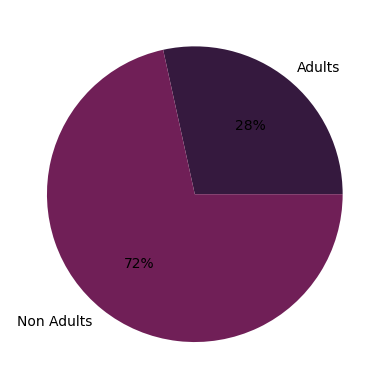

In [ ]:
adults = 0
non_adults = 0
for i in final['AGE_AT_SCAN']:
  if i >= 18:
    adults += 1
  else:
    non_adults += 1
labels = ['Adults','Non Adults']
values = [adults,non_adults]
print(values)
palette_color = sns.color_palette('rocket')
plt.pie(values, labels=labels, colors=palette_color, autopct='%.0f%%')
plt.show()

#Further tuning

In [ ]:
# Create a new DataFrame 'adults_df' containing only entries where age is >= 18
adults_df = final[final['AGE_AT_SCAN'] >= 18]

# Display or further process the new DataFrame
adults_df.tail()

,EYE_STATUS_AT_SCAN,SITE_ID,ADI_R_ONSET_TOTAL_D,ADI_R_VERBAL_TOTAL_BV,FIQ_TEST_TYPE,ADI_R_SOCIAL_TOTAL_A,VINELAND_INTERPERSONAL_V_SCALED,VINELAND_EXPRESSIVE_V_SCALED,HANDEDNESS_CATEGORY,ADI_R_RSRCH_RELIABLE,...,DX_GROUP,VINELAND_COMMUNICATION_STANDARD,FIQ,VINELAND_WRITTEN_V_SCALED,AGE_AT_SCAN,AQ_TOTAL,VINELAND_RECEPTIVE_V_SCALED,VIQ,VINELAND_COPING_V_SCALED,PIQ
2219,1.0,ABIDEII-USM_1,NaN,NaN,WAIS-III,NaN,NaN,NaN,NaN,NaN,...,2,NaN,115.0,NaN,22.0561,NaN,NaN,127.0,NaN,122.0
2220,1.0,ABIDEII-USM_1,NaN,NaN,WAIS-III,NaN,NaN,NaN,NaN,NaN,...,2,NaN,143.0,NaN,27.4114,NaN,NaN,136.0,NaN,145.0
2221,1.0,ABIDEII-USM_1,NaN,NaN,WAIS-III,NaN,NaN,NaN,NaN,NaN,...,2,NaN,115.0,NaN,36.1451,NaN,NaN,119.0,NaN,118.0
2223,1.0,ABIDEII-USM_1,NaN,NaN,WAIS-III,NaN,NaN,NaN,1.0,NaN,...,2,NaN,123.0,NaN,23.2909,NaN,NaN,107.0,NaN,117.0
2224,1.0,ABIDEII-USM_1,NaN,NaN,WAIS-III,NaN,NaN,NaN,NaN,NaN,...,2,NaN,86.0,NaN,32.6242,NaN,NaN,84.0,NaN,84.0


In [ ]:
#names of all the columns in the dataset now
print(adults_df.columns)

Index(['EYE_STATUS_AT_SCAN', 'SITE_ID', 'ADI_R_ONSET_TOTAL_D',
       'ADI_R_VERBAL_TOTAL_BV', 'FIQ_TEST_TYPE', 'ADI_R_SOCIAL_TOTAL_A',
       'VINELAND_INTERPERSONAL_V_SCALED', 'VINELAND_EXPRESSIVE_V_SCALED',
       'HANDEDNESS_CATEGORY', 'ADI_R_RSRCH_RELIABLE', 'ADOS_MODULE',
       'VINELAND_DOMESTIC_V_SCALED', 'VIQ_TEST_TYPE', 'HANDEDNESS_SCORES',
       'OFF_STIMULANTS_AT_SCAN', 'SCQ_TOTAL', 'SUB_ID', 'AGE_AT_MPRAGE',
       'CURRENT_MED_STATUS', 'VINELAND_SOCIAL_STANDARD',
       'VINELAND_PERSONAL_V_SCALED', 'VINELAND_COMMUNITY_V_SCALED',
       'VINELAND_INFORMANT', 'ADOS_RSRCH_RELIABLE', 'SEX',
       'VINELAND_PLAY_V_SCALED', 'VINELAND_SUM_SCORES', 'PIQ_TEST_TYPE',
       'SRS_VERSION', 'BMI', 'DX_GROUP', 'VINELAND_COMMUNICATION_STANDARD',
       'FIQ', 'VINELAND_WRITTEN_V_SCALED', 'AGE_AT_SCAN', 'AQ_TOTAL',
       'VINELAND_RECEPTIVE_V_SCALED', 'VIQ', 'VINELAND_COPING_V_SCALED',
       'PIQ'],
      dtype='object')


In [ ]:
adults_df.shape

(633, 40)

#Checking whether the columns have more null values and non null values

In [ ]:
removal = []
non_removal = []
for col in adults_df.columns:
    null_count = adults_df[col].isnull().sum()
    non_null_count = adults_df[col].notnull().sum()
    if null_count > non_null_count:

        removal.append(col)
        print(f"Column: {col}")
        print(f"  Null values: {null_count}")
        print(f"  Non-null values: {non_null_count}")
    else:
      non_removal.append(col)
print('Columns to be removed:',len(removal))

Column: ADI_R_ONSET_TOTAL_D
  Null values: 511
  Non-null values: 122
Column: ADI_R_VERBAL_TOTAL_BV
  Null values: 509
  Non-null values: 124
Column: ADI_R_SOCIAL_TOTAL_A
  Null values: 509
  Non-null values: 124
Column: VINELAND_INTERPERSONAL_V_SCALED
  Null values: 581
  Non-null values: 52
Column: VINELAND_EXPRESSIVE_V_SCALED
  Null values: 581
  Non-null values: 52
Column: ADI_R_RSRCH_RELIABLE
  Null values: 513
  Non-null values: 120
Column: VINELAND_DOMESTIC_V_SCALED
  Null values: 581
  Non-null values: 52
Column: HANDEDNESS_SCORES
  Null values: 378
  Non-null values: 255
Column: OFF_STIMULANTS_AT_SCAN
  Null values: 586
  Non-null values: 47
Column: SCQ_TOTAL
  Null values: 573
  Non-null values: 60
Column: AGE_AT_MPRAGE
  Null values: 633
  Non-null values: 0
Column: VINELAND_SOCIAL_STANDARD
  Null values: 581
  Non-null values: 52
Column: VINELAND_PERSONAL_V_SCALED
  Null values: 581
  Non-null values: 52
Column: VINELAND_COMMUNITY_V_SCALED
  Null values: 581
  Non-null valu

In [ ]:
#printing the columns to be removed
print("Columns to be Removal:")
for i in removal:
  print(i)

Columns to be Removal:
ADI_R_ONSET_TOTAL_D
ADI_R_VERBAL_TOTAL_BV
ADI_R_SOCIAL_TOTAL_A
VINELAND_INTERPERSONAL_V_SCALED
VINELAND_EXPRESSIVE_V_SCALED
ADI_R_RSRCH_RELIABLE
VINELAND_DOMESTIC_V_SCALED
HANDEDNESS_SCORES
OFF_STIMULANTS_AT_SCAN
SCQ_TOTAL
AGE_AT_MPRAGE
VINELAND_SOCIAL_STANDARD
VINELAND_PERSONAL_V_SCALED
VINELAND_COMMUNITY_V_SCALED
VINELAND_INFORMANT
ADOS_RSRCH_RELIABLE
VINELAND_PLAY_V_SCALED
VINELAND_SUM_SCORES
SRS_VERSION
BMI
VINELAND_COMMUNICATION_STANDARD
VINELAND_WRITTEN_V_SCALED
AQ_TOTAL
VINELAND_RECEPTIVE_V_SCALED
VINELAND_COPING_V_SCALED


In [ ]:
#printing the columns to not be removed
print("Non removal:")
for i in non_removal:
  print(i)

Non removal:
EYE_STATUS_AT_SCAN
SITE_ID
FIQ_TEST_TYPE
HANDEDNESS_CATEGORY
ADOS_MODULE
VIQ_TEST_TYPE
SUB_ID
CURRENT_MED_STATUS
SEX
PIQ_TEST_TYPE
DX_GROUP
FIQ
AGE_AT_SCAN
VIQ
PIQ


In [ ]:
for col in non_removal:
  null_count = adults_df[col].isnull().sum()
  non_null_count = adults_df[col].notnull().sum()
  prop = round(null_count/(null_count+non_null_count),2)
  print(f"Column: {col}")
  print(f"  Null values: {null_count}")
  print(f"  Non-null values: {non_null_count}")
  print(f"  Proportion of null values: {prop}")

Column: EYE_STATUS_AT_SCAN
  Null values: 0
  Non-null values: 633
  Proportion of null values: 0.0
Column: SITE_ID
  Null values: 0
  Non-null values: 633
  Proportion of null values: 0.0
Column: FIQ_TEST_TYPE
  Null values: 59
  Non-null values: 574
  Proportion of null values: 0.09
Column: HANDEDNESS_CATEGORY
  Null values: 151
  Non-null values: 482
  Proportion of null values: 0.24
Column: ADOS_MODULE
  Null values: 296
  Non-null values: 337
  Proportion of null values: 0.47
Column: VIQ_TEST_TYPE
  Null values: 240
  Non-null values: 393
  Proportion of null values: 0.38
Column: SUB_ID
  Null values: 0
  Non-null values: 633
  Proportion of null values: 0.0
Column: CURRENT_MED_STATUS
  Null values: 191
  Non-null values: 442
  Proportion of null values: 0.3
Column: SEX
  Null values: 0
  Non-null values: 633
  Proportion of null values: 0.0
Column: PIQ_TEST_TYPE
  Null values: 196
  Non-null values: 437
  Proportion of null values: 0.31
Column: DX_GROUP
  Null values: 0
  Non-nul

In [ ]:
#dataset after removing the necessry columns
adults_df_modified = adults_df[non_removal]
adults_df_modified.head()

,EYE_STATUS_AT_SCAN,SITE_ID,FIQ_TEST_TYPE,HANDEDNESS_CATEGORY,ADOS_MODULE,VIQ_TEST_TYPE,SUB_ID,CURRENT_MED_STATUS,SEX,PIQ_TEST_TYPE,DX_GROUP,FIQ,AGE_AT_SCAN,VIQ,PIQ
0,2.0,CALTECH,WASI,R,4.0,WASI,51456,NaN,1,WASI,1,126.0,55.4,118.0,128.0
1,2.0,CALTECH,WASI,Ambi,4.0,WASI,51457,NaN,1,WASI,1,107.0,22.9,119.0,93.0
2,2.0,CALTECH,WASI,R,4.0,WASI,51458,NaN,1,WASI,1,93.0,39.2,80.0,108.0
3,2.0,CALTECH,WASI,R,4.0,WASI,51459,NaN,1,WASI,1,106.0,22.8,94.0,118.0
4,2.0,CALTECH,WASI,Ambi,4.0,WASI,51460,NaN,2,WASI,1,133.0,34.6,135.0,122.0


#Checking for further null values

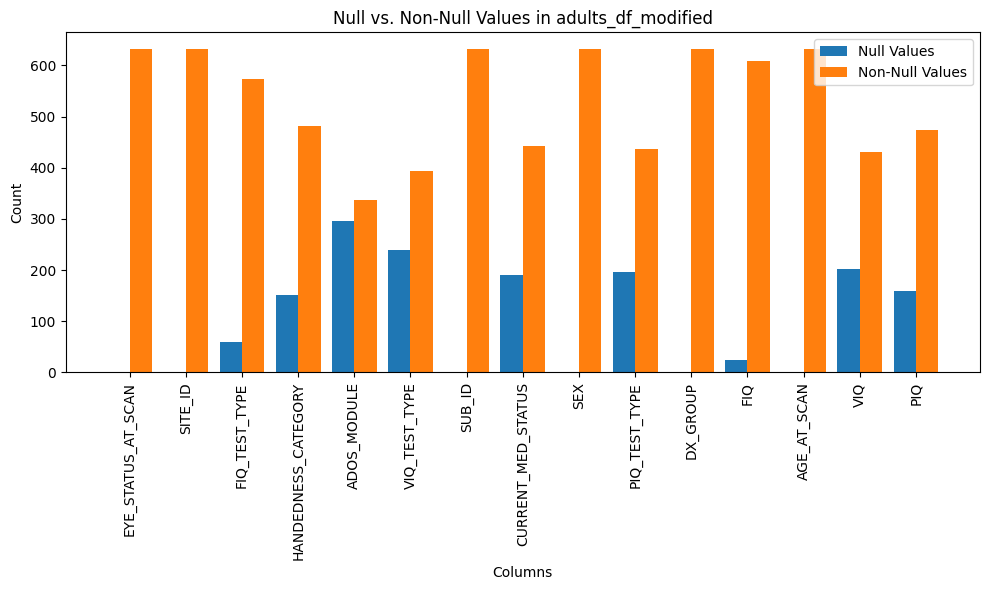

In [ ]:
import matplotlib.pyplot as plt

null_counts = adults_df_modified.isnull().sum()
non_null_counts = adults_df_modified.notnull().sum()

plt.figure(figsize=(10, 6))
X_axis = np.arange(len(adults_df_modified.columns))

plt.bar(X_axis - 0.2, null_counts, 0.4, label='Null Values')
plt.bar(X_axis + 0.2, non_null_counts, 0.4, label='Non-Null Values')

plt.xticks(X_axis, adults_df_modified.columns, rotation=90)
plt.xlabel("Columns")
plt.ylabel("Count")
plt.title("Null vs. Non-Null Values in adults_df_modified")
plt.legend()
plt.tight_layout()
plt.show()

#Removing null values

In [ ]:
for i in adults_df_modified.columns:
  print(i, ";Number of null values:", adults_df_modified[i].isnull().sum())

EYE_STATUS_AT_SCAN ;Number of null values: 0
SITE_ID ;Number of null values: 0
FIQ_TEST_TYPE ;Number of null values: 59
HANDEDNESS_CATEGORY ;Number of null values: 151
ADOS_MODULE ;Number of null values: 296
VIQ_TEST_TYPE ;Number of null values: 240
SUB_ID ;Number of null values: 0
CURRENT_MED_STATUS ;Number of null values: 191
SEX ;Number of null values: 0
PIQ_TEST_TYPE ;Number of null values: 196
DX_GROUP ;Number of null values: 0
FIQ ;Number of null values: 25
AGE_AT_SCAN ;Number of null values: 0
VIQ ;Number of null values: 203
PIQ ;Number of null values: 159


## Replacing null values with mode

In [ ]:
#preprocessing null values in FIQ_TEST_TYPE
adults_df_modified['FIQ_TEST_TYPE'] = adults_df_modified['FIQ_TEST_TYPE'].fillna(adults_df_modified['FIQ_TEST_TYPE'].mode()[0])

#preprocessing null values in PIQ_TEST_TYPE
adults_df_modified['PIQ_TEST_TYPE'] = adults_df_modified['PIQ_TEST_TYPE'].fillna(adults_df_modified['PIQ_TEST_TYPE'].mode()[0])

#preprocessing null values in VIQ_TEST_TYPE
adults_df_modified['VIQ_TEST_TYPE'] = adults_df_modified['VIQ_TEST_TYPE'].fillna(adults_df_modified['VIQ_TEST_TYPE'].mode()[0])

#preprocessing null values in CURRENT_MED_STATUS
mode_value1 = adults_df_modified['CURRENT_MED_STATUS'].mode()[0]
adults_df_modified['CURRENT_MED_STATUS'] = adults_df_modified['CURRENT_MED_STATUS'].fillna(mode_value1)

#preprocessing null values in HANDEDNESS_CATEGORY
adults_df_modified['HANDEDNESS_CATEGORY'] = adults_df_modified['HANDEDNESS_CATEGORY'].fillna(adults_df_modified['HANDEDNESS_CATEGORY'].mode()[0])

<ipython-input-21-512cbc078e92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adults_df_modified['FIQ_TEST_TYPE'] = adults_df_modified['FIQ_TEST_TYPE'].fillna(adults_df_modified['FIQ_TEST_TYPE'].mode()[0])
<ipython-input-21-512cbc078e92>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adults_df_modified['PIQ_TEST_TYPE'] = adults_df_modified['PIQ_TEST_TYPE'].fillna(adults_df_modified['PIQ_TEST_TYPE'].mode()[0])
<ipython-input-21-512cbc078e92>:8: SettingWithCopyWarning: 
A value is trying to be set on a c

## Replacing null and incorrect values with mean of the column

###FIQ (Full IQ Standard Score)

In [ ]:
# for FIQ

#before replacement
print(adults_df_modified['FIQ'].describe())
print(adults_df_modified['FIQ'].value_counts())

#replcement procedure
adults_df_modified['FIQ'] = adults_df_modified['FIQ'].apply(lambda x: x if x >= 0 else None)
adults_df_modified['FIQ'] = adults_df_modified['FIQ'].fillna(adults_df_modified['FIQ'].mean())

#after replacement
print(adults_df_modified['FIQ'].describe())
print(adults_df_modified['FIQ'].value_counts())

count     608.000000
mean     -403.724507
std      2225.951645
min     -9999.000000
25%       102.000000
50%       112.000000
75%       120.250000
max       148.000000
Name: FIQ, dtype: float64
FIQ
-9999.0    31
 112.0     23
 106.0     22
 118.0     20
 100.0     19
           ..
 84.0       1
 73.0       1
 138.0      1
 144.0      1
 143.0      1
Name: count, Length: 76, dtype: int64
count    633.000000
mean     111.792894
std       13.151894
min       49.000000
25%      104.000000
50%      111.792894
75%      120.000000
max      148.000000
Name: FIQ, dtype: float64
FIQ
111.792894    56
112.000000    23
106.000000    22
118.000000    20
100.000000    19
              ..
84.000000      1
73.000000      1
138.000000     1
144.000000     1
143.000000     1
Name: count, Length: 76, dtype: int64


<ipython-input-22-a52733490093>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adults_df_modified['FIQ'] = adults_df_modified['FIQ'].apply(lambda x: x if x >= 0 else None)
<ipython-input-22-a52733490093>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adults_df_modified['FIQ'] = adults_df_modified['FIQ'].fillna(adults_df_modified['FIQ'].mean())


###PIQ (Perfomance IQ Standard Score)

In [ ]:
# for PIQ

#before replacement
print(adults_df_modified['PIQ'].describe())
print(adults_df_modified['PIQ'].value_counts())

#replcement procedure
adults_df_modified['PIQ'] = adults_df_modified['PIQ'].apply(lambda x: x if x >= 0 else None)
adults_df_modified['PIQ'] = adults_df_modified['PIQ'].fillna(adults_df_modified['PIQ'].mean())

#after replacement
print(adults_df_modified['PIQ'].describe())
print(adults_df_modified['PIQ'].value_counts())

count     474.000000
mean     -316.295359
std      2034.477537
min     -9999.000000
25%       101.250000
50%       110.000000
75%       119.000000
max       155.000000
Name: PIQ, dtype: float64
PIQ
 119.0     23
-9999.0    20
 106.0     20
 110.0     19
 103.0     19
           ..
 77.0       1
 80.0       1
 97.0       1
 98.0       1
 145.0      1
Name: count, Length: 73, dtype: int64
count    633.000000
mean     110.255507
std       12.263610
min       63.000000
25%      106.000000
50%      110.255507
75%      117.000000
max      155.000000
Name: PIQ, dtype: float64
PIQ
110.255507    179
119.000000     23
106.000000     20
110.000000     19
103.000000     19
             ... 
77.000000       1
80.000000       1
97.000000       1
98.000000       1
145.000000      1
Name: count, Length: 73, dtype: int64


<ipython-input-23-02b66a697ea3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adults_df_modified['PIQ'] = adults_df_modified['PIQ'].apply(lambda x: x if x >= 0 else None)
<ipython-input-23-02b66a697ea3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adults_df_modified['PIQ'] = adults_df_modified['PIQ'].fillna(adults_df_modified['PIQ'].mean())


###VIQ (Verbal IQ Standard Score)

In [ ]:
# for VIQ

#before replacement
print(adults_df_modified['VIQ'].describe())
print(adults_df_modified['VIQ'].value_counts())

#replcement procedure
adults_df_modified['VIQ'] = adults_df_modified['VIQ'].apply(lambda x: x if x >= 0 else None)
adults_df_modified['VIQ'] = adults_df_modified['VIQ'].fillna(adults_df_modified['VIQ'].mean())

#after replacement
print(adults_df_modified['PIQ'].describe())
print(adults_df_modified['PIQ'].value_counts())

count     430.000000
mean     -312.248837
std      2027.131691
min     -9999.000000
25%       100.250000
50%       111.000000
75%       120.000000
max       140.000000
Name: VIQ, dtype: float64
VIQ
 109.0     22
 108.0     19
-9999.0    18
 118.0     16
 113.0     15
           ..
 137.0      1
 55.0       1
 77.0       1
 140.0      1
 45.0       1
Name: count, Length: 66, dtype: int64
count    633.000000
mean     110.255507
std       12.263610
min       63.000000
25%      106.000000
50%      110.255507
75%      117.000000
max      155.000000
Name: PIQ, dtype: float64
PIQ
110.255507    179
119.000000     23
106.000000     20
110.000000     19
103.000000     19
             ... 
77.000000       1
80.000000       1
97.000000       1
98.000000       1
145.000000      1
Name: count, Length: 73, dtype: int64


<ipython-input-24-8e10c17546d2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adults_df_modified['VIQ'] = adults_df_modified['VIQ'].apply(lambda x: x if x >= 0 else None)
<ipython-input-24-8e10c17546d2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adults_df_modified['VIQ'] = adults_df_modified['VIQ'].fillna(adults_df_modified['VIQ'].mean())


### For ADOS Module

In [ ]:
# for ADOS_MODULE

#before replacement
print(adults_df_modified['ADOS_MODULE'].describe())
print(adults_df_modified['ADOS_MODULE'].value_counts())

# Calculate the mode of 'ADOS_MODULE'
ados_mode = adults_df_modified['ADOS_MODULE'].mode()[0]

# Replace negative and null values with the mode
adults_df_modified['ADOS_MODULE'] = adults_df_modified['ADOS_MODULE'].apply(lambda x: ados_mode if x < 0 or pd.isnull(x) else x)

#after replacement
print(adults_df_modified['ADOS_MODULE'].describe())
print(adults_df_modified['ADOS_MODULE'].value_counts())

count     337.000000
mean     -589.721068
std      2366.938783
min     -9999.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: ADOS_MODULE, dtype: float64
ADOS_MODULE
 4.0       298
-9999.0     20
 3.0        16
 1.0         2
 2.0         1
Name: count, dtype: int64
count    633.000000
mean       3.962085
std        0.242254
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        4.000000
Name: ADOS_MODULE, dtype: float64
ADOS_MODULE
4.0    614
3.0     16
1.0      2
2.0      1
Name: count, dtype: int64


<ipython-input-25-67937d42c583>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adults_df_modified['ADOS_MODULE'] = adults_df_modified['ADOS_MODULE'].apply(lambda x: ados_mode if x < 0 or pd.isnull(x) else x)


In [ ]:
adults_df_modified['ADOS_MODULE'].value_counts()

,count
ADOS_MODULE,
4.0,614
3.0,16
1.0,2
2.0,1


In [ ]:
adults_df_modified['FIQ_TEST_TYPE'].value_counts()

,count
FIQ_TEST_TYPE,
WASI,300
WAIS-III,71
KBIT-2,58
WAIS_III,56
WST,41
WASI-II,40
WISC,28
WAIS-IV-NL,26
WAIS-IV,3


In [ ]:
adults_df_modified['PIQ_TEST_TYPE'].value_counts()

,count
PIQ_TEST_TYPE,
WASI,418
WAIS_III,42
WASI-II,40
WISC,28
WAIS-IV-NL,26
Raven,24
RAVENS,19
WAIS-III,12
Ravens,9


In [ ]:
adults_df_modified['VIQ_TEST_TYPE'].value_counts()

,count
VIQ_TEST_TYPE,
WASI,461
WAIS_III,42
WASI-II,40
WISC,28
WAIS-IV-NL,26
WAIS-III,12
GIT,8
PPVT,6
PPVT,3


In [ ]:
adults_df_modified['CURRENT_MED_STATUS'].value_counts()

,count
CURRENT_MED_STATUS,
0,402
0.0,176
1,28
1.0,24
-9999,3


In [ ]:
adults_df_modified['HANDEDNESS_CATEGORY'].value_counts()

,count
HANDEDNESS_CATEGORY,
1.0,396
R,183
2.0,16
3.0,15
L,12
Ambi,9
-9999,2


# Remove SUB_ID

In [ ]:
adults_df_modified = adults_df_modified.drop('SUB_ID', axis=1)
adults_df_modified.head()

,EYE_STATUS_AT_SCAN,SITE_ID,FIQ_TEST_TYPE,HANDEDNESS_CATEGORY,ADOS_MODULE,VIQ_TEST_TYPE,CURRENT_MED_STATUS,SEX,PIQ_TEST_TYPE,DX_GROUP,FIQ,AGE_AT_SCAN,VIQ,PIQ
0,2.0,CALTECH,WASI,R,4.0,WASI,0,1,WASI,1,126.0,55.4,118.0,128.0
1,2.0,CALTECH,WASI,Ambi,4.0,WASI,0,1,WASI,1,107.0,22.9,119.0,93.0
2,2.0,CALTECH,WASI,R,4.0,WASI,0,1,WASI,1,93.0,39.2,80.0,108.0
3,2.0,CALTECH,WASI,R,4.0,WASI,0,1,WASI,1,106.0,22.8,94.0,118.0
4,2.0,CALTECH,WASI,Ambi,4.0,WASI,0,2,WASI,1,133.0,34.6,135.0,122.0


In [ ]:
adults_df_modified = adults_df_modified.drop('SITE_ID', axis=1)
adults_df_modified.head()

,EYE_STATUS_AT_SCAN,FIQ_TEST_TYPE,HANDEDNESS_CATEGORY,ADOS_MODULE,VIQ_TEST_TYPE,CURRENT_MED_STATUS,SEX,PIQ_TEST_TYPE,DX_GROUP,FIQ,AGE_AT_SCAN,VIQ,PIQ
0,2.0,WASI,R,4.0,WASI,0,1,WASI,1,126.0,55.4,118.0,128.0
1,2.0,WASI,Ambi,4.0,WASI,0,1,WASI,1,107.0,22.9,119.0,93.0
2,2.0,WASI,R,4.0,WASI,0,1,WASI,1,93.0,39.2,80.0,108.0
3,2.0,WASI,R,4.0,WASI,0,1,WASI,1,106.0,22.8,94.0,118.0
4,2.0,WASI,Ambi,4.0,WASI,0,2,WASI,1,133.0,34.6,135.0,122.0


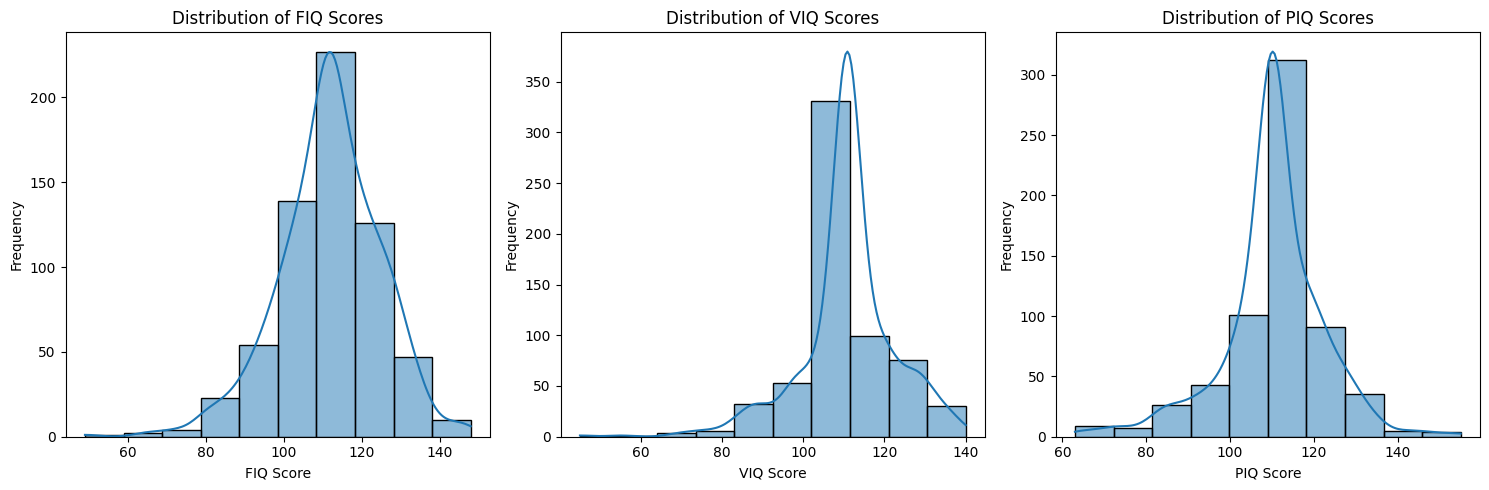

In [ ]:
plt.figure(figsize=(15, 5))  # Adjust figure size

plt.subplot(1, 3, 1)
sns.histplot(adults_df_modified['FIQ'], bins=10, kde=True)
plt.title('Distribution of FIQ Scores')
plt.xlabel('FIQ Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(adults_df_modified['VIQ'], bins=10, kde=True)
plt.title('Distribution of VIQ Scores')
plt.xlabel('VIQ Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(adults_df_modified['PIQ'], bins=10, kde=True)
plt.title('Distribution of PIQ Scores')
plt.xlabel('PIQ Score')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()


## Correction of data entries in categorical columns

In [ ]:
for col in adults_df_modified.columns:
  if adults_df_modified[col].dtype == 'object':
      print(col,':',adults_df_modified[col].unique())

FIQ_TEST_TYPE : ['WASI' 'WAIS' 'WISC' 'WAIS_III' 'WST' '-9999' 'GIT' 'WISC_IV_4_SUBTESTS'
 'KBIT-2' 'WISC-IV' 'WAIS-IV' 'WASI-II' 'WAIS-IV-NL' 'WAIS-III-NL '
 'WAIS-IV-NL (10 subtests)' 'WAIS-III']
HANDEDNESS_CATEGORY : ['R' 'Ambi' 'L' 1.0 '-9999' 3.0 2.0]
VIQ_TEST_TYPE : ['WASI' 'WAIS' 'WISC' 'WAIS_III' 'GIT' 'PPVT' 'PPVT    ' 'WISC-IV'
 'WAIS-IV' 'WASI-II' 'WAIS-IV-NL' 'WAIS-IV-NL (3 subtests)' 'WAIS-III']
CURRENT_MED_STATUS : ['0' '1' '-9999' 0.0 1.0]
PIQ_TEST_TYPE : ['WASI' 'WAIS' 'WISC' 'WAIS_III' 'RAVENS' 'GIT' 'Ravens' 'WISC-IV'
 'WAIS-IV' 'Raven' 'WASI-II' 'WAIS-IV-NL' 'WAIS-IV-NL (3 subtests)'
 'WAIS-III']


## Removing invalid values from VIQ_TEST_TYPE

In [ ]:
adults_df_modified['VIQ_TEST_TYPE'] = adults_df_modified['VIQ_TEST_TYPE'].replace('PPVT    ', 'PPVT')
adults_df_modified['VIQ_TEST_TYPE'] = adults_df_modified['VIQ_TEST_TYPE'].replace('WAIS_III', 'WAIS-III')
print(adults_df_modified['VIQ_TEST_TYPE'].unique())

['WASI' 'WAIS' 'WISC' 'WAIS-III' 'GIT' 'PPVT' 'WISC-IV' 'WAIS-IV'
 'WASI-II' 'WAIS-IV-NL' 'WAIS-IV-NL (3 subtests)']


## Removing invalid values from PIQ_TEST_TYPE

In [ ]:
adults_df_modified['PIQ_TEST_TYPE'] = adults_df_modified['PIQ_TEST_TYPE'].replace('WAIS_III', 'WAIS-III')
adults_df_modified['PIQ_TEST_TYPE'] = adults_df_modified['PIQ_TEST_TYPE'].replace('Ravens', 'RAVENS')
print(adults_df_modified['PIQ_TEST_TYPE'].unique())

['WASI' 'WAIS' 'WISC' 'WAIS-III' 'RAVENS' 'GIT' 'WISC-IV' 'WAIS-IV'
 'Raven' 'WASI-II' 'WAIS-IV-NL' 'WAIS-IV-NL (3 subtests)']


## Dealing with values from CURRENT_MED_STATUS




In [ ]:
# streamlining data
adults_df_modified['CURRENT_MED_STATUS'] = adults_df_modified['CURRENT_MED_STATUS'].replace(0.0, '0')
adults_df_modified['CURRENT_MED_STATUS'] = adults_df_modified['CURRENT_MED_STATUS'].replace(1.0, '1')

#dealing with invalid values
adults_df_modified['CURRENT_MED_STATUS'] = adults_df_modified['CURRENT_MED_STATUS'].replace('-9999', adults_df_modified['CURRENT_MED_STATUS'].mode()[0])

print(adults_df_modified['CURRENT_MED_STATUS'].unique())

['0' '1']


## Dealing with values from HANDEDNESS_CATEGORY

In [ ]:
#streamlining data
adults_df_modified['HANDEDNESS_CATEGORY'] = adults_df_modified['HANDEDNESS_CATEGORY'].replace(1.0, 'R')
adults_df_modified['HANDEDNESS_CATEGORY'] = adults_df_modified['HANDEDNESS_CATEGORY'].replace(2.0, 'L')
adults_df_modified['HANDEDNESS_CATEGORY'] = adults_df_modified['HANDEDNESS_CATEGORY'].replace(3.0, 'Ambi')

#working with unknown data
adults_df_modified['HANDEDNESS_CATEGORY'] = adults_df_modified['HANDEDNESS_CATEGORY'].replace('-9999', adults_df_modified['HANDEDNESS_CATEGORY'].mode()[0])

adults_df_modified['HANDEDNESS_CATEGORY'].unique()

array(['R', 'Ambi', 'L'], dtype=object)

## Dealing with values from FIQ_TEST_TYPE

In [ ]:
adults_df_modified['FIQ_TEST_TYPE'] = adults_df_modified['FIQ_TEST_TYPE'].replace('-9999', adults_df_modified['FIQ_TEST_TYPE'].mode()[0])
adults_df_modified['FIQ_TEST_TYPE'] = adults_df_modified['FIQ_TEST_TYPE'].replace('Unknown', adults_df_modified['FIQ_TEST_TYPE'].mode()[0])
adults_df_modified['FIQ_TEST_TYPE'] = adults_df_modified['FIQ_TEST_TYPE'].replace('WAIS_III','WAIS-III')

adults_df_modified['FIQ_TEST_TYPE'].unique()

array(['WASI', 'WAIS', 'WISC', 'WAIS-III', 'WST', 'GIT',
       'WISC_IV_4_SUBTESTS', 'KBIT-2', 'WISC-IV', 'WAIS-IV', 'WASI-II',
       'WAIS-IV-NL', 'WAIS-III-NL ', 'WAIS-IV-NL (10 subtests)'],
      dtype=object)

#Normalising data using MinMaxScaler



In [ ]:
# Select columns to normalize (excluding 'ADOS_MODULE')
cols_to_normalize = [col for col in adults_df_modified.columns if col != 'ADOS_MODULE' and pd.api.types.is_numeric_dtype(adults_df_modified[col])]

# Normalize selected columns using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
adults_df_modified[cols_to_normalize] = scaler.fit_transform(adults_df_modified[cols_to_normalize])

adults_df_modified.head()

,EYE_STATUS_AT_SCAN,FIQ_TEST_TYPE,HANDEDNESS_CATEGORY,ADOS_MODULE,VIQ_TEST_TYPE,CURRENT_MED_STATUS,SEX,PIQ_TEST_TYPE,DX_GROUP,FIQ,AGE_AT_SCAN,VIQ,PIQ
0,1.0,WASI,R,4.0,WASI,0,0.0,WASI,0.0,0.777778,0.813043,0.768421,0.706522
1,1.0,WASI,Ambi,4.0,WASI,0,0.0,WASI,0.0,0.585859,0.106522,0.778947,0.326087
2,1.0,WASI,R,4.0,WASI,0,0.0,WASI,0.0,0.444444,0.460870,0.368421,0.489130
3,1.0,WASI,R,4.0,WASI,0,0.0,WASI,0.0,0.575758,0.104348,0.515789,0.597826
4,1.0,WASI,Ambi,4.0,WASI,0,1.0,WASI,0.0,0.848485,0.360870,0.947368,0.641304


In [ ]:
adults_df_modified['ADOS_MODULE'].value_counts()

,count
ADOS_MODULE,
4.0,614
3.0,16
1.0,2
2.0,1


## Grouping all the categorical features

In [ ]:
cat_features = []

for col in adults_df_modified.columns:
  if adults_df_modified[col].dtype == 'object':
      #print(col,':',adults_df_modified[col].unique())
      cat_features.append(col)
print(cat_features)

['FIQ_TEST_TYPE', 'HANDEDNESS_CATEGORY', 'VIQ_TEST_TYPE', 'CURRENT_MED_STATUS', 'PIQ_TEST_TYPE']


## Counting their unique values

In [ ]:
adults_df_modified['HANDEDNESS_CATEGORY'].value_counts(normalize=True)

,proportion
HANDEDNESS_CATEGORY,
R,0.917852
L,0.044234
Ambi,0.037915


In [ ]:
adults_df_modified['PIQ_TEST_TYPE'].value_counts(normalize=True)

,proportion
PIQ_TEST_TYPE,
WASI,0.660348
WAIS-III,0.085308
WASI-II,0.063191
WISC,0.044234
RAVENS,0.044234
WAIS-IV-NL,0.041074
Raven,0.037915
GIT,0.012638
WAIS-IV,0.004739


In [ ]:
adults_df_modified['FIQ_TEST_TYPE'].value_counts(normalize=True)

,proportion
FIQ_TEST_TYPE,
WASI,0.478673
WAIS-III,0.200632
KBIT-2,0.091627
WST,0.064771
WASI-II,0.063191
WISC,0.044234
WAIS-IV-NL,0.041074
WAIS-IV,0.004739
WISC-IV,0.003160


In [ ]:
adults_df_modified['VIQ_TEST_TYPE'].value_counts(normalize=True)

,proportion
VIQ_TEST_TYPE,
WASI,0.728278
WAIS-III,0.085308
WASI-II,0.063191
WISC,0.044234
WAIS-IV-NL,0.041074
PPVT,0.014218
GIT,0.012638
WAIS-IV,0.004739
WISC-IV,0.003160


###Putting in ADOS_MODULE

In [ ]:
cat_features.append('ADOS_MODULE')

## Printing the unique columns in the dataset

In [ ]:
adults_df_modified.columns

Index(['EYE_STATUS_AT_SCAN', 'FIQ_TEST_TYPE', 'HANDEDNESS_CATEGORY',
       'ADOS_MODULE', 'VIQ_TEST_TYPE', 'CURRENT_MED_STATUS', 'SEX',
       'PIQ_TEST_TYPE', 'DX_GROUP', 'FIQ', 'AGE_AT_SCAN', 'VIQ', 'PIQ'],
      dtype='object')

### Converting the data in 'SEX' and 'EYE_STATUS_AT_SCAN' columns into strings and grouping them with the other categorical values

In [ ]:
adults_df_modified['SEX'].value_counts()

,count
SEX,
0.0,540
1.0,93


In [ ]:
adults_df_modified['SEX'] = adults_df_modified['SEX'].astype(str)

In [ ]:
adults_df_modified['EYE_STATUS_AT_SCAN'] = adults_df_modified['EYE_STATUS_AT_SCAN'].astype(str)

In [ ]:
cat_features.append('SEX')
cat_features.append('EYE_STATUS_AT_SCAN')

# Printing the categorical features

In [ ]:
cat_features

['FIQ_TEST_TYPE',
 'HANDEDNESS_CATEGORY',
 'VIQ_TEST_TYPE',
 'CURRENT_MED_STATUS',
 'PIQ_TEST_TYPE',
 'ADOS_MODULE',
 'SEX',
 'EYE_STATUS_AT_SCAN']

In [ ]:
for col in cat_features:
  adults_df_modified[col] = adults_df_modified[col].astype('category')

# Converting categorical data to numerical data

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder(handle_unknown='ignore', sparse_output=False) #handle_unknown added
transformer = ColumnTransformer([("one_hot", one_hot, cat_features)], remainder="passthrough")

transformed_adults_df = transformer.fit_transform(adults_df_modified)

# Convert the result back to a DataFrame for easier handling
# Get feature names after one-hot encoding
feature_names = list(transformer.named_transformers_['one_hot'].get_feature_names_out(cat_features))
remaining_cols = [col for col in adults_df_modified.columns if col not in cat_features]
feature_names.extend(remaining_cols)


transformed_adults_df = pd.DataFrame(transformed_adults_df, columns=feature_names)

transformed_adults_df.head()


,FIQ_TEST_TYPE_GIT,FIQ_TEST_TYPE_KBIT-2,FIQ_TEST_TYPE_WAIS,FIQ_TEST_TYPE_WAIS-III,FIQ_TEST_TYPE_WAIS-III-NL,FIQ_TEST_TYPE_WAIS-IV,FIQ_TEST_TYPE_WAIS-IV-NL,FIQ_TEST_TYPE_WAIS-IV-NL (10 subtests),FIQ_TEST_TYPE_WASI,FIQ_TEST_TYPE_WASI-II,...,ADOS_MODULE_4.0,SEX_0.0,SEX_1.0,EYE_STATUS_AT_SCAN_0.0,EYE_STATUS_AT_SCAN_1.0,DX_GROUP,FIQ,AGE_AT_SCAN,VIQ,PIQ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.777778,0.813043,0.768421,0.706522
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.585859,0.106522,0.778947,0.326087
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.444444,0.460870,0.368421,0.489130
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.575758,0.104348,0.515789,0.597826
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.848485,0.360870,0.947368,0.641304


In [ ]:
transformed_adults_df.shape

(633, 55)

## Distribution after normalisation

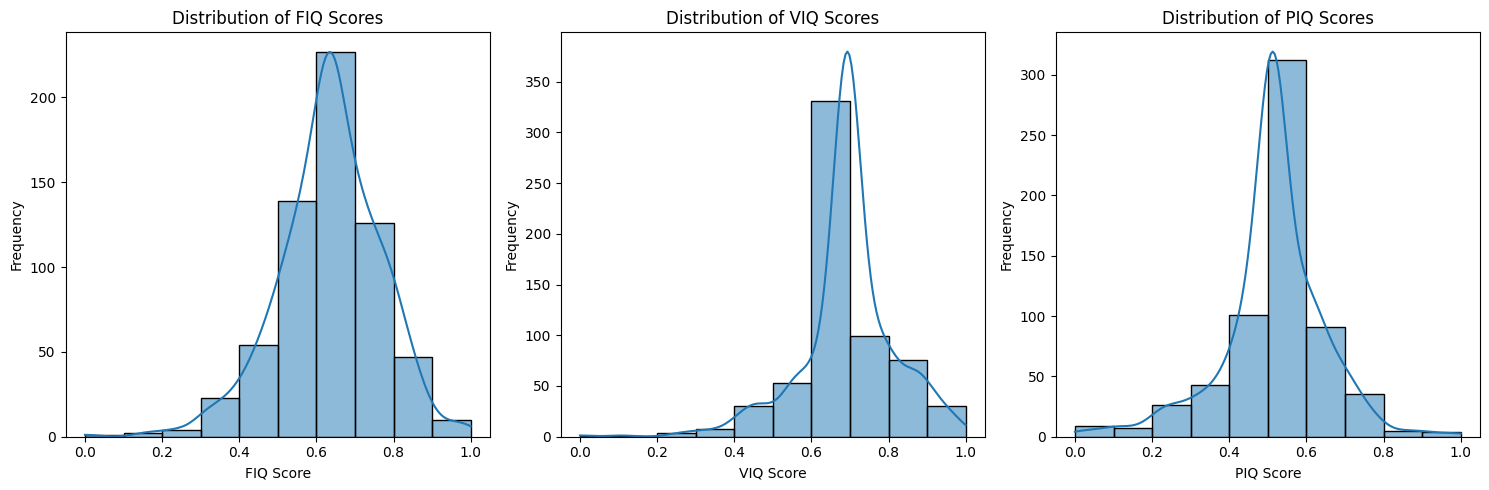

In [ ]:
plt.figure(figsize=(15, 5))  # Adjust figure size

plt.subplot(1, 3, 1)
sns.histplot(transformed_adults_df['FIQ'], bins=10, kde=True)
plt.title('Distribution of FIQ Scores')
plt.xlabel('FIQ Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(transformed_adults_df['VIQ'], bins=10, kde=True)
plt.title('Distribution of VIQ Scores')
plt.xlabel('VIQ Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(transformed_adults_df['PIQ'], bins=10, kde=True)
plt.title('Distribution of PIQ Scores')
plt.xlabel('PIQ Score')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

# Outlier Detection

## Initial shape

In [ ]:
transformed_adults_df.shape

(633, 55)

#Removing outliers

In [ ]:
#mean
fiq_mean = transformed_adults_df['FIQ'].mean()
piq_mean = transformed_adults_df['PIQ'].mean()
viq_mean = transformed_adults_df['VIQ'].mean()
#std
fiq_std = transformed_adults_df['FIQ'].std()
piq_std = transformed_adults_df['PIQ'].std()
viq_std = transformed_adults_df['VIQ'].std()


def remove_outliers(df,dummy_mean,dummy_std,dummy):
  upper = dummy_mean + 3 * dummy_std
  lower = dummy_mean - 3 * dummy_std
  df = df[(df[dummy] <= upper) & (df[dummy] >= lower)]
  return df

transformed_adults_df = remove_outliers(transformed_adults_df,fiq_mean,fiq_std,'FIQ')
transformed_adults_df = remove_outliers(transformed_adults_df,piq_mean,piq_std,'PIQ')
transformed_adults_df = remove_outliers(transformed_adults_df,viq_mean,viq_std,'VIQ')

transformed_adults_df.shape

(615, 55)

## Final Dataset

In [ ]:
transformed_adults_df.head()

,FIQ_TEST_TYPE_GIT,FIQ_TEST_TYPE_KBIT-2,FIQ_TEST_TYPE_WAIS,FIQ_TEST_TYPE_WAIS-III,FIQ_TEST_TYPE_WAIS-III-NL,FIQ_TEST_TYPE_WAIS-IV,FIQ_TEST_TYPE_WAIS-IV-NL,FIQ_TEST_TYPE_WAIS-IV-NL (10 subtests),FIQ_TEST_TYPE_WASI,FIQ_TEST_TYPE_WASI-II,...,ADOS_MODULE_4.0,SEX_0.0,SEX_1.0,EYE_STATUS_AT_SCAN_0.0,EYE_STATUS_AT_SCAN_1.0,DX_GROUP,FIQ,AGE_AT_SCAN,VIQ,PIQ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.777778,0.813043,0.768421,0.706522
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.585859,0.106522,0.778947,0.326087
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.444444,0.460870,0.368421,0.489130
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.575758,0.104348,0.515789,0.597826
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.848485,0.360870,0.947368,0.641304


## Distribution after removing outliers

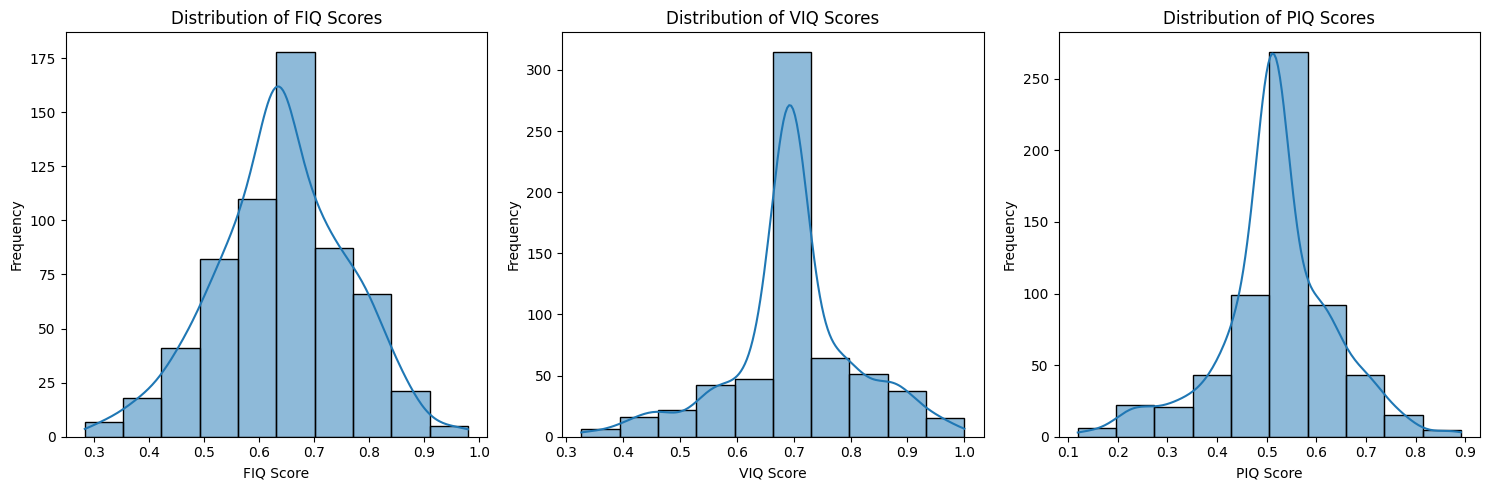

In [ ]:
plt.figure(figsize=(15, 5))  # Adjust figure size

plt.subplot(1, 3, 1)
sns.histplot(transformed_adults_df['FIQ'], bins=10, kde=True)
plt.title('Distribution of FIQ Scores')
plt.xlabel('FIQ Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(transformed_adults_df['VIQ'], bins=10, kde=True)
plt.title('Distribution of VIQ Scores')
plt.xlabel('VIQ Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(transformed_adults_df['PIQ'], bins=10, kde=True)
plt.title('Distribution of PIQ Scores')
plt.xlabel('PIQ Score')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

# Separating the inputs and outputs

In [ ]:
X = transformed_adults_df.drop('DX_GROUP', axis=1)
Y = transformed_adults_df['DX_GROUP']

In [ ]:
X

,FIQ_TEST_TYPE_GIT,FIQ_TEST_TYPE_KBIT-2,FIQ_TEST_TYPE_WAIS,FIQ_TEST_TYPE_WAIS-III,FIQ_TEST_TYPE_WAIS-III-NL,FIQ_TEST_TYPE_WAIS-IV,FIQ_TEST_TYPE_WAIS-IV-NL,FIQ_TEST_TYPE_WAIS-IV-NL (10 subtests),FIQ_TEST_TYPE_WASI,FIQ_TEST_TYPE_WASI-II,...,ADOS_MODULE_3.0,ADOS_MODULE_4.0,SEX_0.0,SEX_1.0,EYE_STATUS_AT_SCAN_0.0,EYE_STATUS_AT_SCAN_1.0,FIQ,AGE_AT_SCAN,VIQ,PIQ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.777778,0.813043,0.768421,0.706522
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.585859,0.106522,0.778947,0.326087
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.444444,0.460870,0.368421,0.489130
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.575758,0.104348,0.515789,0.597826
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.848485,0.360870,0.947368,0.641304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.666667,0.088176,0.863158,0.641304
629,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.949495,0.204596,0.957895,0.891304
630,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.666667,0.394459,0.778947,0.597826
631,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.747475,0.115020,0.652632,0.586957


In [ ]:
Y

,DX_GROUP
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
628,1.0
629,1.0
630,1.0
631,1.0


## splitting into training and testing sets

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Dimension reduction through PCA (not necessary)

In [ ]:
principal=PCA(n_components=1)
principal.fit(X_train)
X_transformed_train = principal.transform(X_train)
principal.fit(X_test)
X_transformed_test = principal.transform(X_test)

## Length of transformed training and testing datasets

In [ ]:
len(X_train)

492

In [ ]:
len(X_test)

123

#Importing additional libraries

In [ ]:

!pip install scikit-learn==1.3.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 75.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report,recall_score,precision_score
from sklearn.metrics import roc_curve, auc
import numpy as np
import math
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

# Implementing XGBoost

## Tuning XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': np.arange(3, 10),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'subsample': np.linspace(0.5, 1.0, 5),
    'gamma': np.linspace(0, 1, 5),
    'min_child_weight': np.arange(1,5,10),
    'colsample_bytree': np.linspace(0.5, 1.0, 5)

}
xgb = XGBClassifier()
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=20, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
random_search.fit(X_train, Y_train)

print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': np.float64(1.0), 'n_estimators': np.int64(100), 'min_child_weight': np.int64(1), 'max_depth': np.int64(6), 'learning_rate': np.float64(0.07444444444444444), 'gamma': np.float64(0.5), 'colsample_bytree': np.float64(1.0)}


In [ ]:
xgboost = XGBClassifier(n_estimators = 250,subsample = 1.0,min_child_weight =6,max_depth = 5,learning_rate = 0.011,gamma = 0,colsample_bytree = 1)
xgboost.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.011, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=6, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

## Confusion Matrix

## Accuracy score

In [ ]:
Y_prediction_XGB = xgboost.predict(X_test)
accuracy = accuracy_score(Y_test, Y_prediction_XGB)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7560975609756098


In [ ]:
print(classification_report(Y_test, Y_prediction_XGB))

              precision    recall  f1-score   support

         0.0       0.73      0.67      0.70        52
         1.0       0.77      0.82      0.79        71

    accuracy                           0.76       123
   macro avg       0.75      0.74      0.75       123
weighted avg       0.75      0.76      0.75       123



In [ ]:
rms = np.sqrt(np.mean(np.square(Y_test - Y_prediction_XGB)))
print(f"Root Mean Squared Error (RMSE) for XGBoost: {rms}")

Root Mean Squared Error (RMSE) for XGBoost: 0.4938647983247948


In [ ]:
f1 = f1_score(Y_test, Y_prediction_XGB, average='weighted') #'weighted' for multiclass problems
print(f"F1-Score: {f1}")

F1-Score: 0.7545606414968259


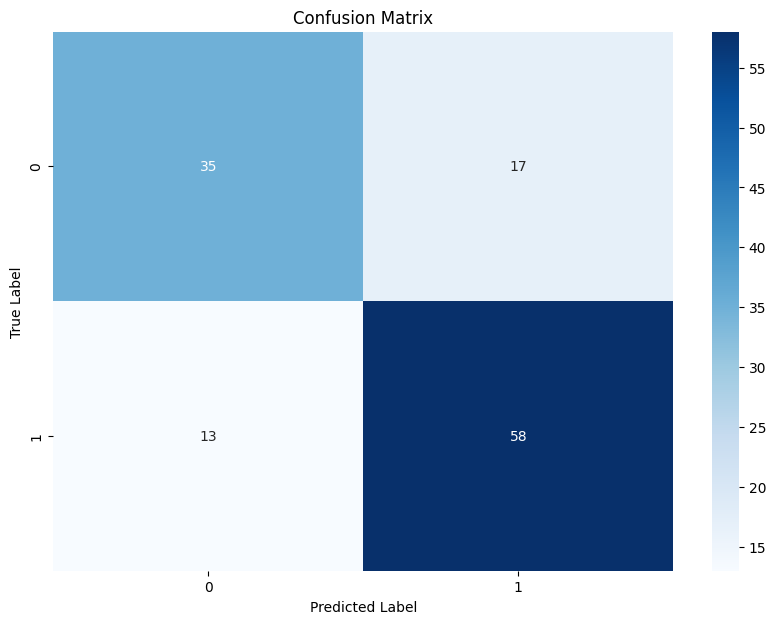

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, Y_prediction_XGB)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## ROC Curve

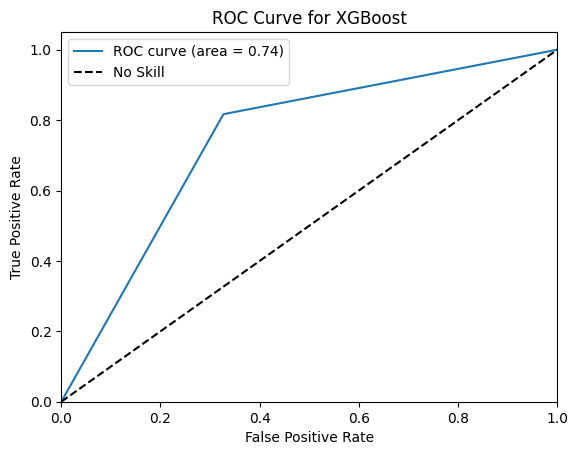

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test,Y_prediction_XGB)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend()
plt.show()

# Implementing LDA

## Tuning LDA

In [ ]:
X_train.shape

(492, 54)

In [ ]:
rfe = RFE(estimator=LinearDiscriminantAnalysis(), n_features_to_select=7)
X_train_selected = rfe.fit_transform(X_train, Y_train)
X_test_selected = rfe.transform(X_test)
estimator = LinearDiscriminantAnalysis(n_components = 1,shrinkage='auto',solver='eigen',tol=1e-5)
estimator.fit(X_train_selected, Y_train)

LinearDiscriminantAnalysis(n_components=1, shrinkage='auto', solver='eigen',
                           tol=1e-05)

## Accuracy score

In [ ]:
Y_prediction_lda = estimator.predict(X_test_selected)
accuracy = accuracy_score(Y_test, Y_prediction_lda)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7317073170731707


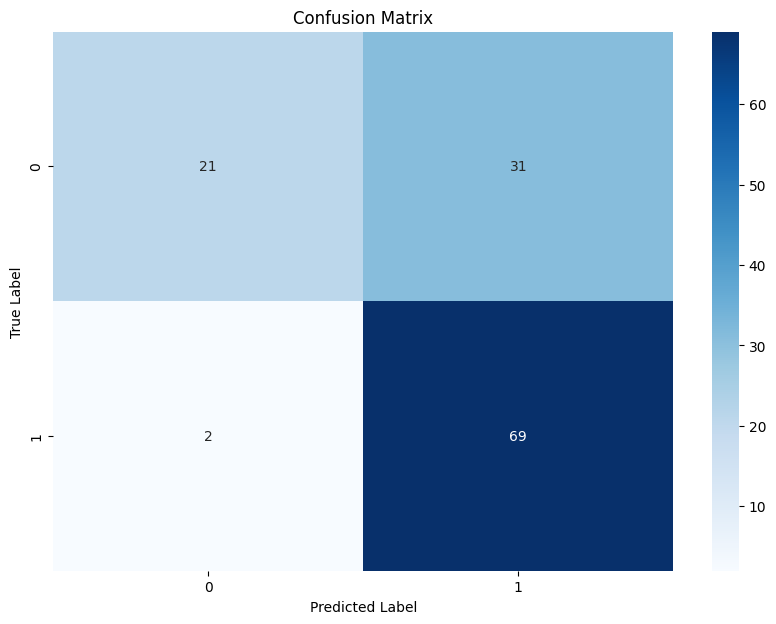

In [ ]:
conf_matrix = confusion_matrix(Y_test, Y_prediction_lda)

plt.figure(figsize=(10, 7))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(Y_test, Y_prediction_lda))

              precision    recall  f1-score   support

         0.0       0.91      0.40      0.56        52
         1.0       0.69      0.97      0.81        71

    accuracy                           0.73       123
   macro avg       0.80      0.69      0.68       123
weighted avg       0.78      0.73      0.70       123



## ROC Curve

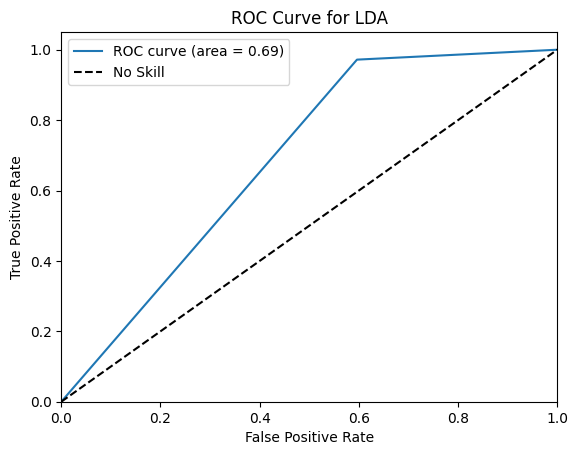

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test,Y_prediction_lda)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA')
plt.legend()
plt.show()

In [ ]:
rms = np.sqrt(np.mean(np.square(Y_test - Y_prediction_lda)))
print(f"Root Mean Squared Error (RMSE) for LDA: {rms}")

Root Mean Squared Error (RMSE) for LDA: 0.5179697702828122


In [ ]:
f1 = f1_score(Y_test, Y_prediction_XGB, average='weighted') #'weighted' for multiclass problems
print(f"F1-Score: {f1}")

F1-Score: 0.7545606414968259


## Using K-Nearest Neighbour

## Tuning hyperparameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn = KNeighborsClassifier()

param_dist = {
    'n_neighbors': np.arange(1, 50, 2),  # Odd values of k
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1,2], #for power parameter
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=20, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
random_search.fit(X_train, Y_train)

print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'weights': 'distance', 'p': 2, 'n_neighbors': np.int64(37), 'metric': 'euclidean', 'algorithm': 'auto'}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=44,weights='uniform',p=1,metric='euclidean',algorithm='ball_tree')
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='ball_tree', metric='euclidean', n_neighbors=44,
                     p=1)

In [ ]:
Y_prediction_knn = knn.predict(X_test)
accuracy = accuracy_score(Y_test, Y_prediction_knn)
print(f"Accuracy of KNN: {accuracy}")

Accuracy of KNN: 0.6747967479674797


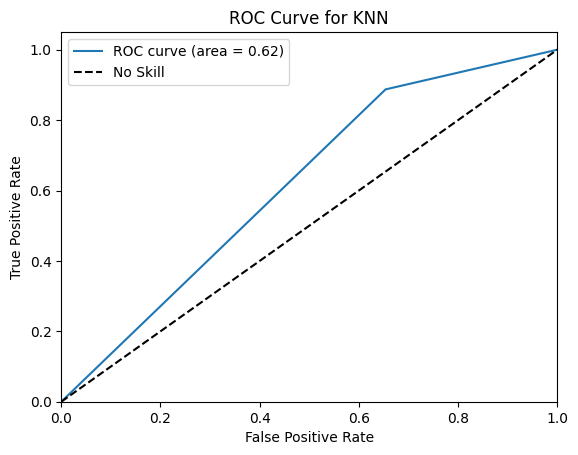

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test,Y_prediction_knn)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend()
plt.show()

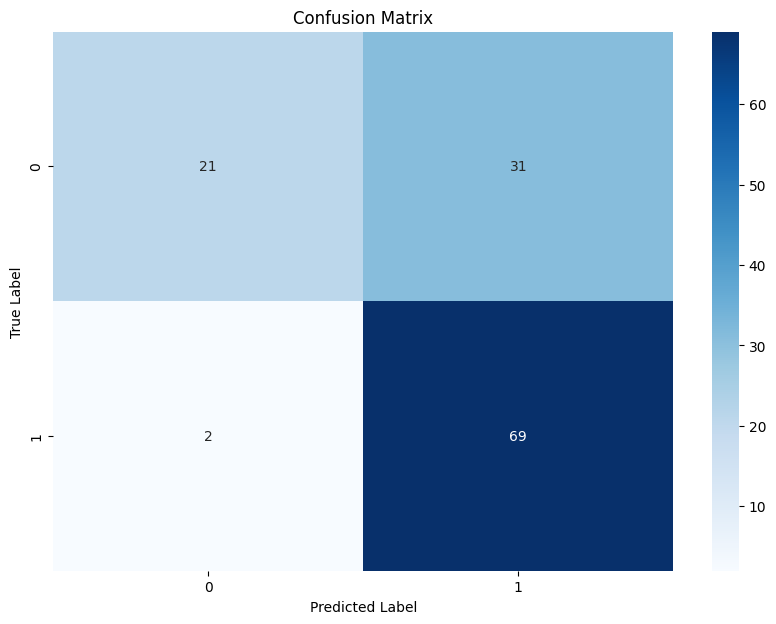

In [ ]:
conf_matrix = confusion_matrix(Y_test, Y_prediction_lda)

plt.figure(figsize=(10, 7))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import math

# Assuming Y_prediction_lda and Y_test are already defined
f1 = f1_score(Y_test, Y_prediction_lda, average='weighted')
print(f"F1-Score for KNN: {f1}")

rms = math.sqrt(mean_squared_error(Y_test, Y_prediction_lda))
print(f"Root Mean Squared Error (RMSE) for KNN: {rms}")


F1-Score for KNN: 0.7025873627157324
Root Mean Squared Error (RMSE) for KNN: 0.5179697702828122


# Random forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 30)
clf.fit(X_train, Y_train)
Y_prediction_RF = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_prediction_RF)
print(f"Accuracy of RF: {accuracy}")

Accuracy of RF: 0.6585365853658537


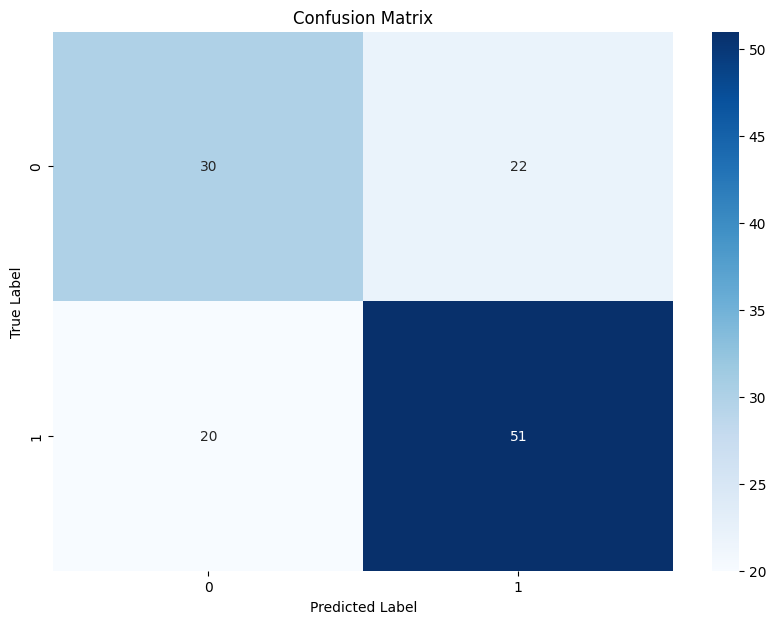

In [ ]:
conf_matrix = confusion_matrix(Y_test, Y_prediction_RF)

plt.figure(figsize=(10, 7))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

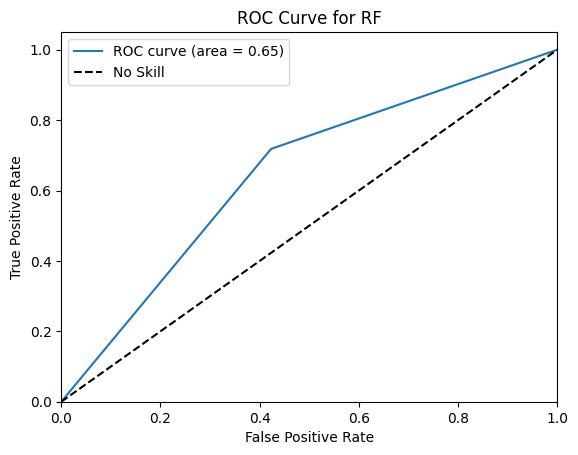

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test,Y_prediction_RF)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RF')
plt.legend()
plt.show()

### RMS Error

In [ ]:
rms = np.sqrt(np.mean(np.square(Y_test - Y_prediction_RF)))
print(f"Root Mean Squared Error (RMSE) for RF: {rms}")
f1 = f1_score(Y_test, Y_prediction_RF, average='weighted')
print(f"F1-Score for RF: {f1}")

Root Mean Squared Error (RMSE) for RF: 0.5843487097907776
F1-Score for RF: 0.657560178542962


# LightGBM

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

lgb_train = lgb.Dataset(X_train, label=Y_train)
lgb_test = lgb.Dataset(X_test, label=Y_test, reference=lgb_train)
lgbm = lgb.LGBMClassifier()
param_dist = {
    'num_leaves': np.arange(20, 200, 10),
    'learning_rate': np.logspace(-3, 0, 10),
    'n_estimators': np.arange(100, 2000, 100),
    'num_leaves': [31, 50, 100]
}

random_search = RandomizedSearchCV(lgbm, param_distributions=param_dist, n_iter=20, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
random_search.fit(X_train, Y_train)

print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 261, number of negative: 231
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 297
[LightGBM] [Info] Number of data points in the train set: 492, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530488 -> initscore=0.122103
[LightGBM] [Info] Start training from score 0.122103
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [ ]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, label=Y_train)
lgb_test = lgb.Dataset(X_test, label=Y_test, reference=lgb_train)

model = lgb.LGBMClassifier(objective= 'binary',  # Binary classification
     metric= 'logloss',  # Log loss for evaluation
     boosting_type = 'gbdt',
     learning_rate= 0.001,
     n_estimators = 280,
     num_leaves= 900,
     max_depth= -1,
     verbose = -1)
model.fit(X_train, Y_train)
Y_prediction_lgb = model.predict(X_test)
#print(Y_prediction_lgb)

In [ ]:
accuracy = accuracy_score(Y_test, Y_prediction_lgb)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7480


## RMS Error

In [ ]:
rms = np.sqrt(np.mean(np.square(Y_test - Y_prediction_lgb)))
print(f"Root Mean Squared Error (RMSE) for LightGBM: {rms}")

Root Mean Squared Error (RMSE) for LightGBM: 0.5020284058947294


F1-Score

In [ ]:
f1 = f1_score(Y_test, Y_prediction_lgb, average='weighted')
print(f"F1-Score for LightGBM: {f1}")

F1-Score for LightGBM: 0.7435400000566753


## Classification report

In [ ]:
print(classification_report(Y_test, Y_prediction_lgb))

              precision    recall  f1-score   support

         0.0       0.74      0.62      0.67        52
         1.0       0.75      0.85      0.79        71

    accuracy                           0.75       123
   macro avg       0.75      0.73      0.73       123
weighted avg       0.75      0.75      0.74       123



## ROC Curve

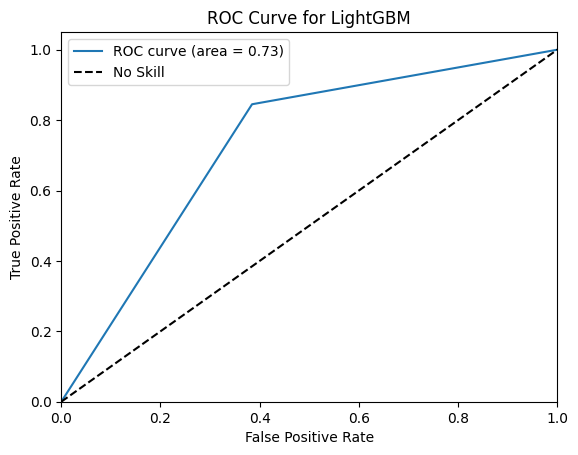

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test,Y_prediction_lgb)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LightGBM')
plt.legend()
plt.show()

## Confusion Matrix

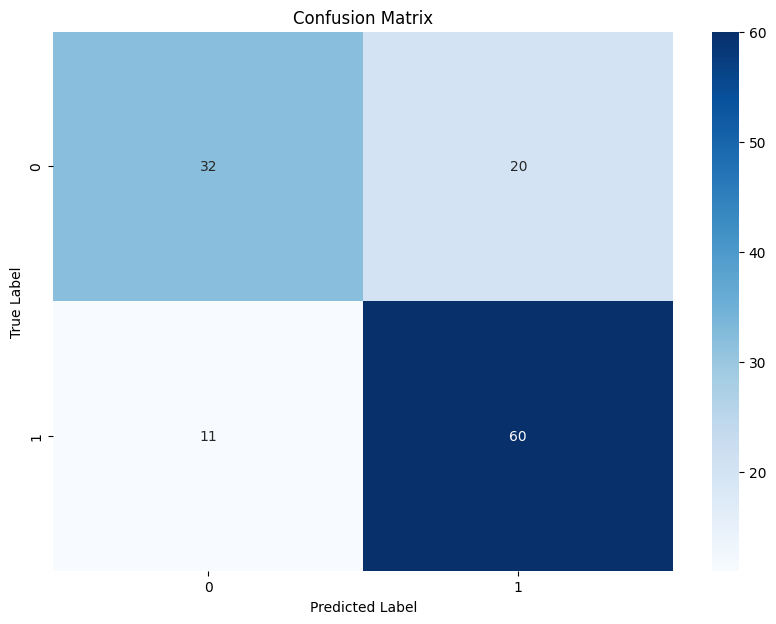

In [ ]:
conf_matrix = confusion_matrix(Y_test, Y_prediction_lgb)

plt.figure(figsize=(10, 7))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

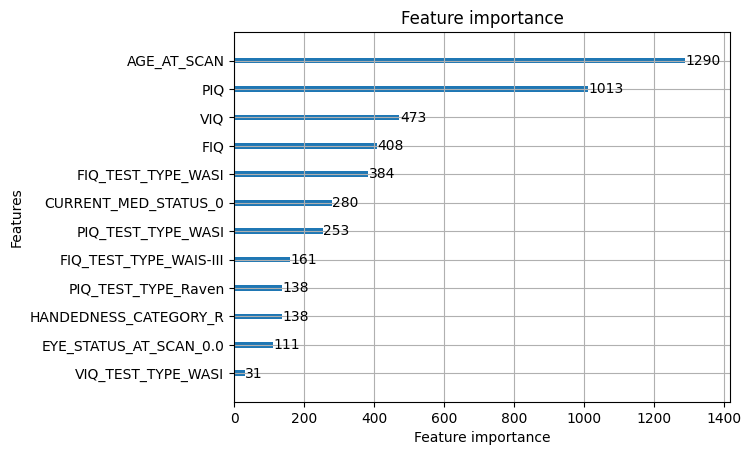

In [ ]:
lgb.plot_importance(model)

### Without preprocessing

In [ ]:
adults_df_modified.columns

Index(['DX_GROUP', 'FIQ_TEST_TYPE', 'HANDEDNESS_CATEGORY', 'FIQ',
       'EYE_STATUS_AT_SCAN', 'PIQ_TEST_TYPE', 'VIQ', 'CURRENT_MED_STATUS',
       'ADOS_MODULE', 'AGE_AT_SCAN', 'VIQ_TEST_TYPE', 'SEX', 'PIQ'],
      dtype='object')

In [ ]:
X_lgb = adults_df_modified.drop('DX_GROUP', axis=1)
Y_lgb = adults_df_modified['DX_GROUP']

In [ ]:
for col in cat_features:
    X_lgb[col] = X_lgb[col].astype('category')

In [ ]:
X_lgb_train,X_lgb_test,Y_lgb_train,Y_lgb_test =train_test_split(X_lgb,Y_lgb,test_size=0.2,random_state=42)

In [ ]:
lgb_train = lgb.Dataset(X_lgb_train, label=Y_lgb_train)
lgb_test = lgb.Dataset(X_lgb_test, label=Y_lgb_test, reference=lgb_train)

lgb_model = lgb.LGBMClassifier(
    objective= 'binary',  # Binary classification
     metric= 'binary_logloss',  # Log loss for evaluation
     learning_rate= 0.01,
     num_leaves= 31,
     max_depth= -1
)
lgb_model.fit(X_lgb_train,Y_lgb_train)
Y_prediction_lgb = lgb_model.predict(X_lgb_test)
accuracy = accuracy_score(Y_lgb_test, Y_prediction_lgb)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.6535


In [ ]:
print(classification_report(Y_lgb_test, Y_prediction_lgb))

              precision    recall  f1-score   support

         0.0       0.73      0.44      0.55        61
         1.0       0.62      0.85      0.72        66

    accuracy                           0.65       127
   macro avg       0.68      0.65      0.63       127
weighted avg       0.67      0.65      0.64       127



<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

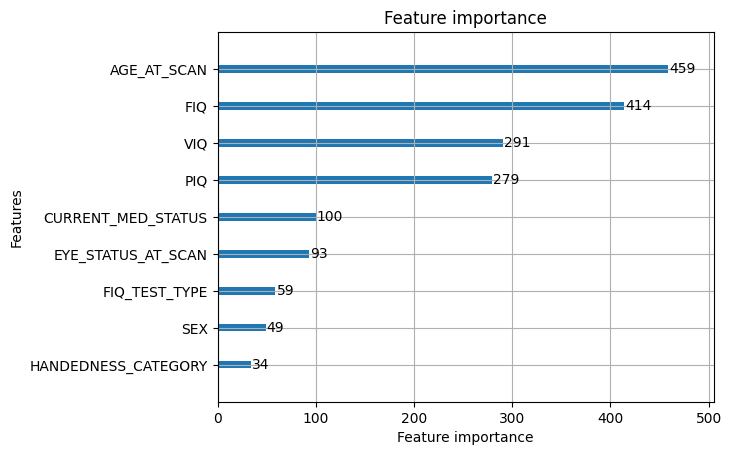

In [ ]:
lgb.plot_importance(lgb_model)

# CatBoost

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 77.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [ ]:
X_catb = adults_df_modified.drop('DX_GROUP', axis=1)
Y_catb = adults_df_modified['DX_GROUP']

In [ ]:
X_Catb_train,X_Catb_test,Y_Catb_train,Y_Catb_test = train_test_split(X_catb,Y_catb,test_size=0.2,random_state=42)

In [ ]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(iterations=2,learning_rate=1,depth=2)
cat_features_names = list(X_catb.select_dtypes(include=['category']).columns)
cat_model.fit(X_train, Y_train)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
X_test.columns == X_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
Y_prediction_catboost = cat_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_prediction_catboost)
print(accuracy)

NameError: name 'cat_model' is not defined

In [ ]:
print(classification_report(Y_test, Y_prediction_catboost))

              precision    recall  f1-score   support

         0.0       0.77      0.52      0.62        52
         1.0       0.72      0.89      0.79        71

    accuracy                           0.73       123
   macro avg       0.74      0.70      0.71       123
weighted avg       0.74      0.73      0.72       123



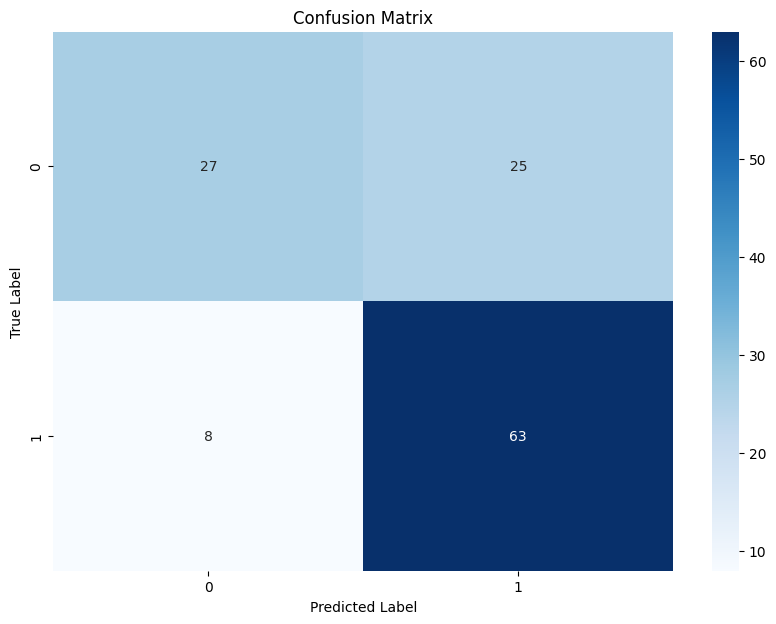

In [ ]:
conf_matrix = confusion_matrix(Y_test, Y_prediction_catboost)

plt.figure(figsize=(10, 7))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import catboost
feature_importance = cat_model.get_feature_importance()
# Get the names of features used by the model (after encoding)
feature_names_catboost = cat_model.feature_names_

# Create a DataFrame with the correct feature names
feature_importance_df = pd.DataFrame({'Feature': feature_names_catboost, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                                   Feature  Importance
12                    CURRENT_MED_STATUS_0   58.147720
5                 VIQ_TEST_TYPE_WAIS-IV-NL   32.011739
56                                     VIQ    7.986824
57                             AGE_AT_SCAN    1.853717
43                   FIQ_TEST_TYPE_WISC-IV    0.000000
32                    FIQ_TEST_TYPE_KBIT-2    0.000000
33                      FIQ_TEST_TYPE_WAIS    0.000000
34                  FIQ_TEST_TYPE_WAIS-III    0.000000
35              FIQ_TEST_TYPE_WAIS-III-NL     0.000000
36                   FIQ_TEST_TYPE_WAIS-IV    0.000000
37                FIQ_TEST_TYPE_WAIS-IV-NL    0.000000
38  FIQ_TEST_TYPE_WAIS-IV-NL (10 subtests)    0.000000
39                  FIQ_TEST_TYPE_WAIS_III    0.000000
40                      FIQ_TEST_TYPE_WASI    0.000000
41                   FIQ_TEST_TYPE_WASI-II    0.000000
42                      FIQ_TEST_TYPE_WISC    0.000000
45                       FIQ_TEST_TYPE_WST    0.000000
44        

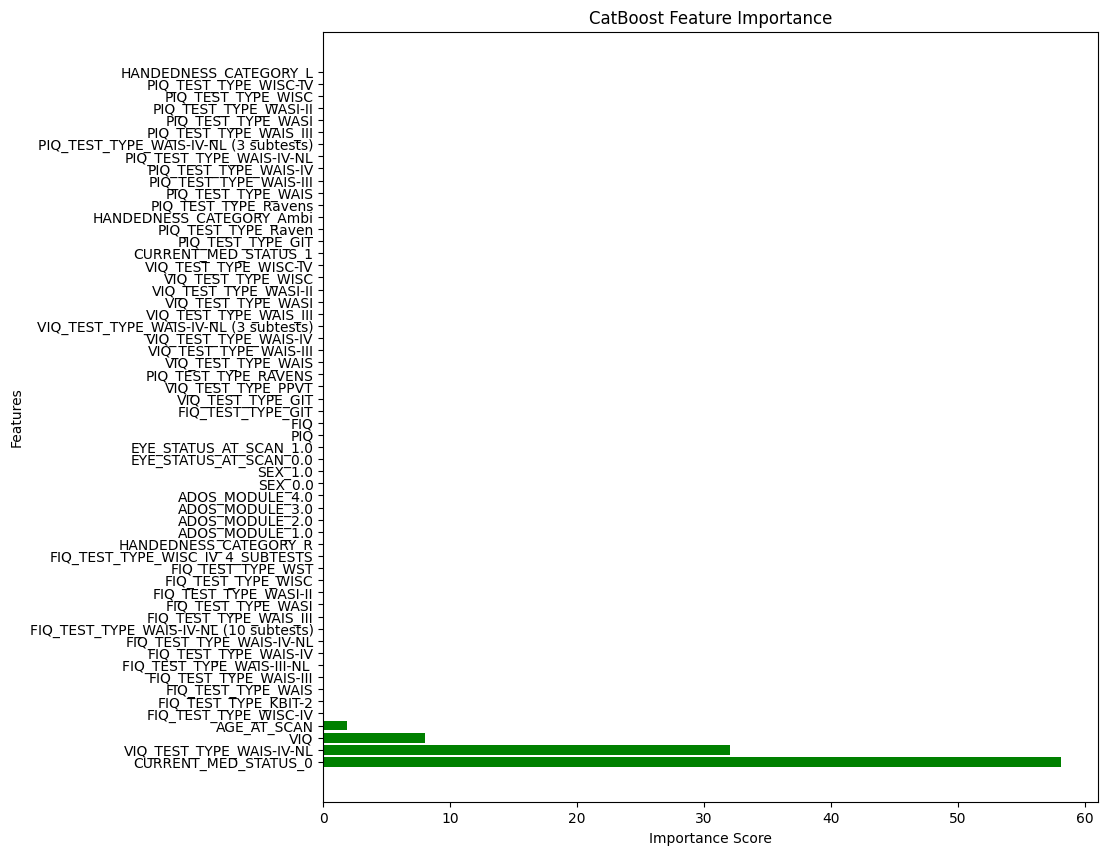

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='green')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('CatBoost Feature Importance')
#plt.gca().invert_yaxis()  # Invert y-axis to have most important on top
plt.show()


# Create an ensemble ML Model out of the two


## Voting Classifier

In [ ]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [ ]:
# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[('xgb', xgboost), ('lda', estimator),('lgbm',model)], voting='hard')
ensemble_model.fit(X_train, Y_train)

# Make predictions with the ensemble model
Y_prediction_ensemble = ensemble_model.predict(X_test)

In [ ]:
print(classification_report(Y_test,Y_prediction_ensemble))

              precision    recall  f1-score   support

         0.0       0.78      0.62      0.69        52
         1.0       0.76      0.87      0.81        71

    accuracy                           0.76       123
   macro avg       0.77      0.74      0.75       123
weighted avg       0.77      0.76      0.76       123



In [ ]:
# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(Y_test, Y_prediction_ensemble)
print(f"Ensemble Model Accuracy: {accuracy_ensemble}")

Ensemble Model Accuracy: 0.7642276422764228


In [ ]:
rms = np.sqrt(np.mean(np.square(Y_test - Y_prediction_ensemble)))
print(f"Root Mean Squared Error (RMSE) for ensemble: {rms}")

f1 = f1_score(Y_test, Y_prediction_ensemble, average='weighted')
print(f"F1-Score for ensemble model: {f1}")

Root Mean Squared Error (RMSE) for ensemble: 0.48556395842728817
F1-Score for ensemble model: 0.7587595926560151


In [ ]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(Y_test, Y_prediction_ensemble)
print(f"AUC Score: {auc_score}")

AUC Score: 0.7443120260021668


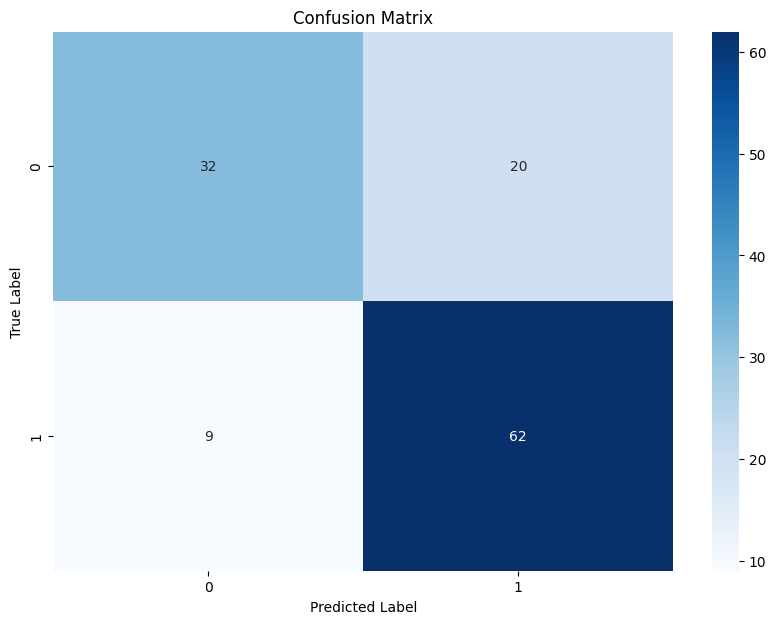

In [ ]:
conf_matrix = confusion_matrix(Y_test, Y_prediction_ensemble)

plt.figure(figsize=(10, 7))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

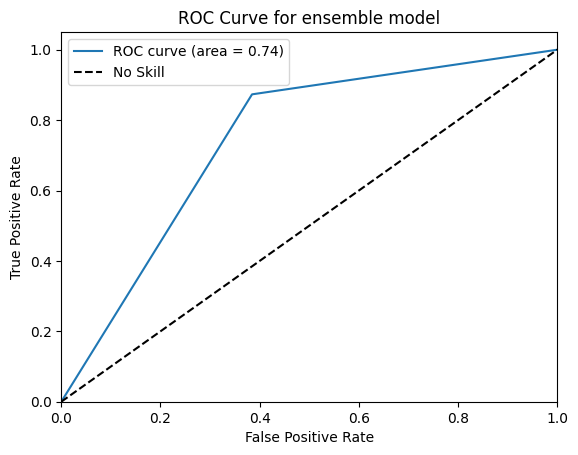

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test,Y_prediction_ensemble)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ensemble model')
plt.legend()
plt.show()

Text(0, 0.5, 'Features')

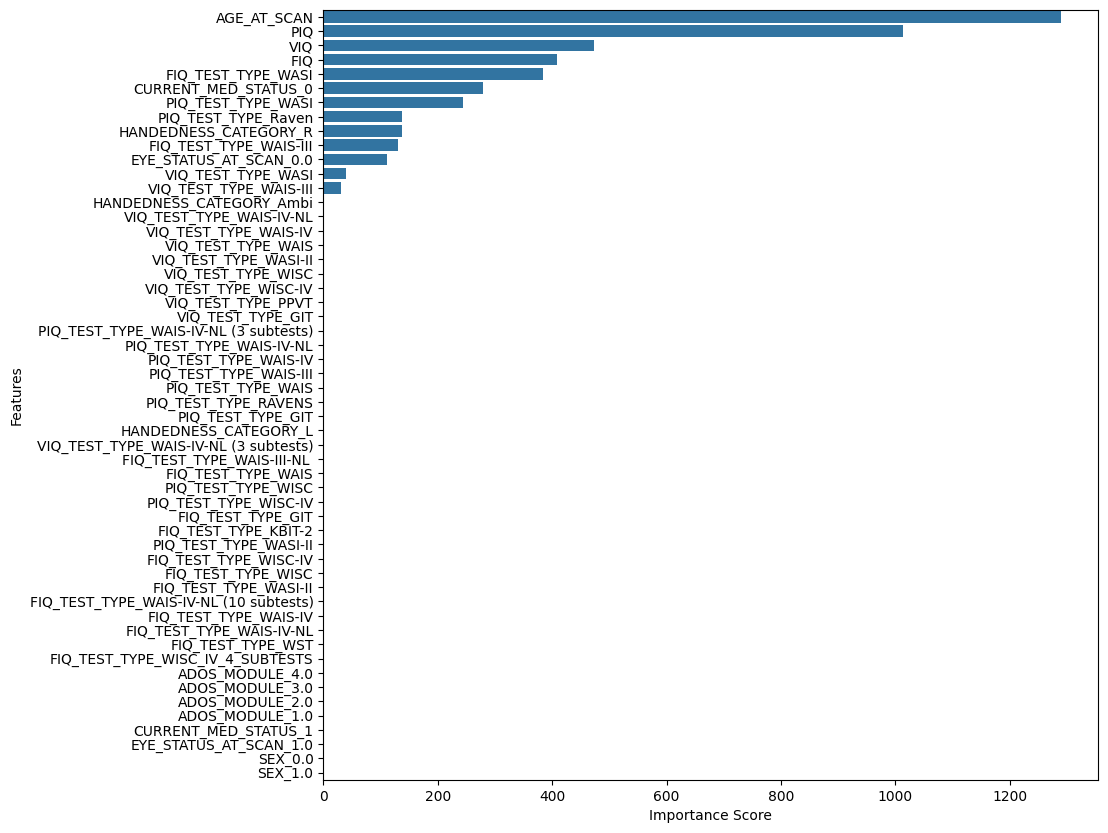

In [ ]:
feature_names = X_train.columns
importance = model.feature_importances_
fi_ensemble = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
fi_ensemble = fi_ensemble.sort_values(by="Importance", ascending=False)
#print(fi_ensemble)
#fi_ensemble = fi_ensemble[fi_ensemble['Importance'] != 0]
plt.figure(figsize=(10, 10))
sns.barplot(fi_ensemble,x = 'Importance',y = 'Feature')
plt.xlabel('Importance Score')
plt.ylabel('Features')

In [ ]:
fi_ensemble['Feature'].unique()

array(['AGE_AT_SCAN', 'PIQ', 'VIQ', 'FIQ', 'FIQ_TEST_TYPE_WASI',
       'CURRENT_MED_STATUS_0', 'PIQ_TEST_TYPE_WASI',
       'HANDEDNESS_CATEGORY_R', 'PIQ_TEST_TYPE_Raven',
       'FIQ_TEST_TYPE_WAIS-III', 'EYE_STATUS_AT_SCAN_0.0',
       'VIQ_TEST_TYPE_WASI', 'PIQ_TEST_TYPE_WAIS-III',
       'VIQ_TEST_TYPE_GIT', 'PIQ_TEST_TYPE_WAIS-IV', 'PIQ_TEST_TYPE_WAIS',
       'PIQ_TEST_TYPE_WAIS-IV-NL (3 subtests)',
       'PIQ_TEST_TYPE_WAIS-IV-NL', 'PIQ_TEST_TYPE_WISC',
       'PIQ_TEST_TYPE_WISC-IV', 'PIQ_TEST_TYPE_RAVENS',
       'PIQ_TEST_TYPE_GIT', 'VIQ_TEST_TYPE_WISC', 'VIQ_TEST_TYPE_WASI-II',
       'VIQ_TEST_TYPE_WAIS-IV-NL (3 subtests)',
       'VIQ_TEST_TYPE_WAIS-IV-NL', 'VIQ_TEST_TYPE_WAIS-III',
       'VIQ_TEST_TYPE_WAIS-IV', 'VIQ_TEST_TYPE_WAIS',
       'VIQ_TEST_TYPE_PPVT', 'PIQ_TEST_TYPE_WASI-II',
       'FIQ_TEST_TYPE_KBIT-2', 'FIQ_TEST_TYPE_WAIS-III-NL ',
       'FIQ_TEST_TYPE_GIT', 'HANDEDNESS_CATEGORY_L',
       'CURRENT_MED_STATUS_1', 'HANDEDNESS_CATEGORY_Ambi',
       'VIQ_

Text(0, 0.5, 'Features')

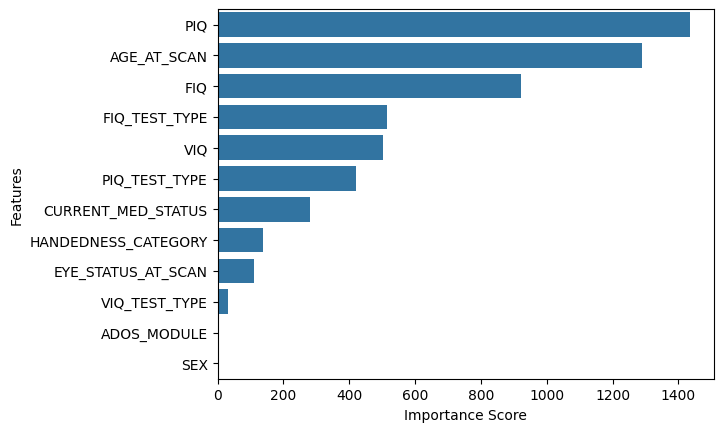

In [ ]:
fi_dict = dict()

# AGE_AT_SCAN = fi_ensemble[fi_ensemble['Feature'].str.startswith('AGE_AT_SCAN')]['Importance'].sum()
# PIQ = fi_ensemble[fi_ensemble['Feature'].str.startswith('PIQ')]['Importance'].sum()
# VIQ = fi_ensemble[fi_ensemble['Feature'].str.startswith('VIQ')]['Importance'].sum()
# FIQ = fi_ensemble[fi_ensemble['Feature'].str.startswith('FIQ')]['Importance'].sum()
# FIQ_TEST_TYPE = fi_ensemble[fi_ensemble['Feature'].str.startswith('FIQ_TEST_TYPE')]['Importance'].sum()
# PIQ_TEST_TYPE = fi_ensemble[fi_ensemble['Feature'].str.startswith('PIQ_TEST_TYPE')]['Importance'].sum()
# VIQ_TEST_TYPE = fi_ensemble[fi_ensemble['Feature'].str.startswith('VIQ_TEST_TYPE')]['Importance'].sum()
# HANDEDNESS_CATEGORY = fi_ensemble[fi_ensemble['Feature'].str.startswith('HANDEDNESS_CATEGORY')]['Importance'].sum()
# CURRENT_MED_STATUS = fi_ensemble[fi_ensemble['Feature'].str.startswith('CURRENT_MED_STATUS')]['Importance'].sum()
# EYE_STATUS_AT_SCAN = fi_ensemble[fi_ensemble['Feature'].str.startswith('EYE_STATUS_AT_SCAN')]['Importance'].sum()
# ADOS_MODULE = fi_ensemble[fi_ensemble['Feature'].str.startswith('ADOS_MODULE')]['Importance'].sum()
# SEX = fi_ensemble[fi_ensemble['Feature'].str.startswith('SEX')]['Importance'].sum()
features = ['AGE_AT_SCAN','PIQ','VIQ','FIQ','FIQ_TEST_TYPE','PIQ_TEST_TYPE','VIQ_TEST_TYPE','HANDEDNESS_CATEGORY','CURRENT_MED_STATUS','EYE_STATUS_AT_SCAN','ADOS_MODULE','SEX']
for feature in features:
  if feature != 'PIQ' or feature != 'VIQ' or feature != 'FIQ':
    fi_dict[feature] = int(fi_ensemble[fi_ensemble['Feature'].str.startswith(feature)]['Importance'].sum())
  else:
    fi_dict[feature] = fi_ensemble[fi_ensemble['Feature']==feature]['Importance']
d = {'Features':features,'Importance':list(fi_dict.values())}
fi_ensemble_final = pd.DataFrame(d)
fi_ensemble_final = fi_ensemble_final.sort_values(by="Importance", ascending=False)

sns.barplot(fi_ensemble_final,x = 'Importance',y = 'Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')

      Model  Accuracy   RMSE  F1-Score  Precision  Recall
0   XGBoost     0.756  0.494     0.755      0.773   0.817
1       LDA     0.732  0.518     0.703      0.690   0.972
2  LightGBM     0.748  0.502     0.744      0.750   0.845
3  Ensemble     0.764  0.486     0.759      0.756   0.873



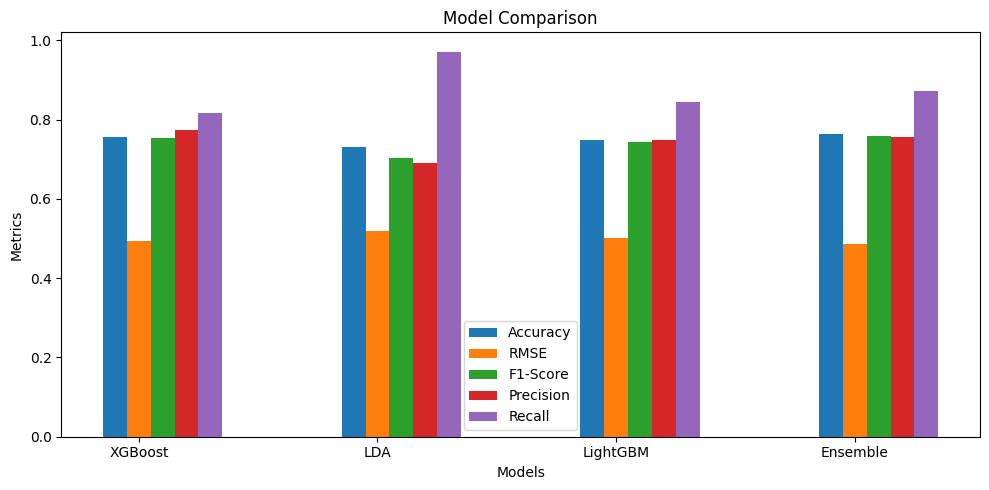

In [ ]:
acc_score = [accuracy_score(Y_test, Y_prediction_XGB), accuracy_score(Y_test, Y_prediction_lda), accuracy_score(Y_test, Y_prediction_lgb), accuracy_score(Y_test, Y_prediction_ensemble)]
rmse = [np.sqrt(mean_squared_error(Y_test, Y_prediction_XGB)), np.sqrt(mean_squared_error(Y_test, Y_prediction_lda)), np.sqrt(mean_squared_error(Y_test, Y_prediction_lgb)), np.sqrt(mean_squared_error(Y_test, Y_prediction_ensemble))]
f1_scores = [f1_score(Y_test, Y_prediction_XGB, average='weighted'), f1_score(Y_test, Y_prediction_lda, average='weighted'), f1_score(Y_test, Y_prediction_lgb, average='weighted'), f1_score(Y_test, Y_prediction_ensemble, average='weighted')]
prec_score = [precision_score(Y_test, Y_prediction_XGB), precision_score(Y_test, Y_prediction_lda), precision_score(Y_test, Y_prediction_lgb), precision_score(Y_test, Y_prediction_ensemble)]
rec_score = [recall_score(Y_test, Y_prediction_XGB), recall_score(Y_test, Y_prediction_lda), recall_score(Y_test, Y_prediction_lgb), recall_score(Y_test, Y_prediction_ensemble)]

models = ['XGBoost', 'LDA', 'LightGBM', 'Ensemble']

acc_score = [round(i,3) for i in acc_score]
rmse = [float(round(i,3)) for i in rmse]
f1_scores = [round(i,3) for i in f1_scores]
prec_score = [round(i,3) for i in prec_score]
rec_score = [round(i,3) for i in rec_score]

metric_df = {'Model': models, 'Accuracy': acc_score, 'RMSE': rmse, 'F1-Score': f1_scores, 'Precision': prec_score, 'Recall': rec_score}
metric_df = pd.DataFrame(metric_df)
print(metric_df)
print()

# print(acc_score)
# print(rmse)
# print(f1_scores)
# print(prec_score)
# print(rec_score)

X_axis = np.arange(len(models))

width = 0.1  # the width of the bars

fig,ax = plt.subplots(figsize=(10,5))
r1 = ax.bar(X_axis - width, acc_score, width = 0.1, label='Accuracy')
r2 = ax.bar(X_axis, rmse, width = 0.1, label='RMSE')
r3 = ax.bar(X_axis + width, f1_scores, width = 0.1, label='F1-Score')
r4 = ax.bar(X_axis + 2*width,prec_score, width = 0.1, label='Precision')
r5 = ax.bar(X_axis + 3*width,rec_score, width = 0.1, label='Recall')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metrics')
ax.set_xlabel('Models')
ax.set_title('Model Comparison')
ax.set_xticks(X_axis)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()


In [ ]:
print('Ensemble Model Accuracy:',accuracy_score(Y_test, Y_prediction_ensemble))
print('Classification Report:')
print(classification_report(Y_test,Y_prediction_ensemble))
print('accuracy of whole dataset:',accuracy_score(Y_test,Y_prediction_ensemble))
print('F1 score of whole datset:',f1_score(Y_test,Y_prediction_ensemble,average='weighted'))
print('RMSE of whole dataset:',np.sqrt(np.mean(np.square(Y_test - Y_prediction_ensemble))))
print(f"AUC of whole dataset: {auc_score}")

Ensemble Model Accuracy: 0.7642276422764228
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.62      0.69        52
         1.0       0.76      0.87      0.81        71

    accuracy                           0.76       123
   macro avg       0.77      0.74      0.75       123
weighted avg       0.77      0.76      0.76       123

accuracy of whole dataset: 0.7642276422764228
F1 score of whole datset: 0.7587595926560151
RMSE of whole dataset: 0.48556395842728817
AUC of whole dataset: 0.7443120260021668


## Learning curve (Not reliable)

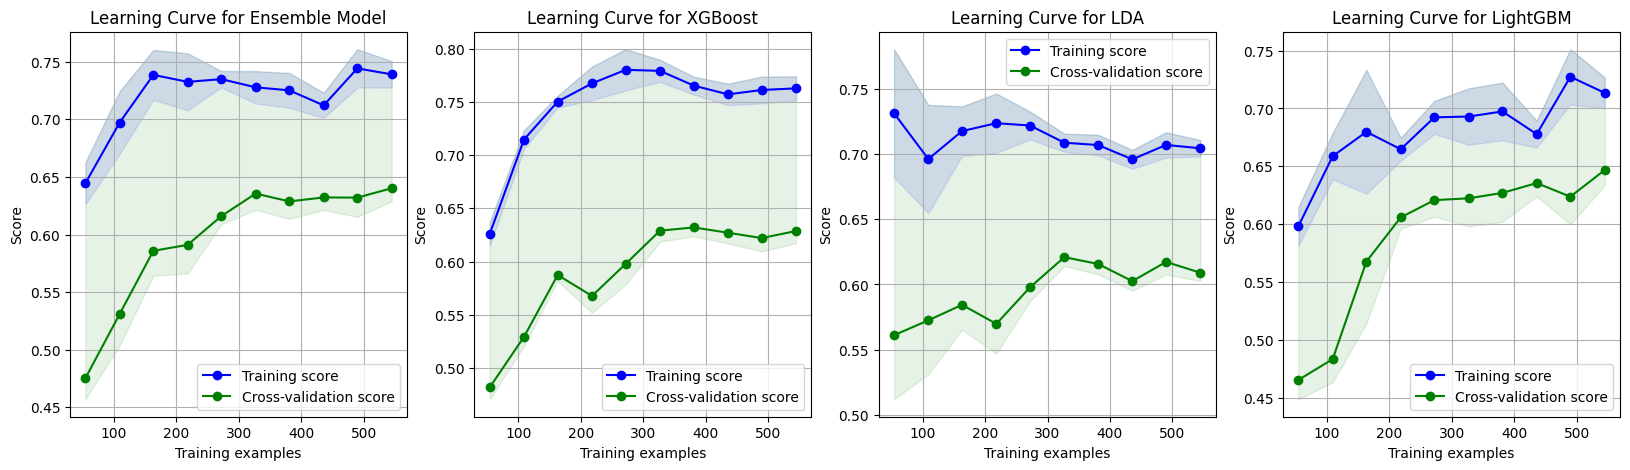

In [ ]:
from sklearn.model_selection import learning_curve

plt.figure(figsize=(20,5))

# "std_display_style": "fill_between
# LDA
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, Y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.subplot(1,4,3)
plt.plot(train_sizes, train_scores_mean, 'o-',color='b',label='Training score')
plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std,color = 'b',alpha = 0.1)
plt.plot(train_sizes, test_scores_mean, 'o-',color='g',label='Cross-validation score')
plt.fill_between(train_sizes, test_scores_mean-train_scores_std, train_scores_mean+train_scores_std, color = 'g',alpha = 0.1)

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for LDA")
plt.legend(loc="best")
plt.grid(True)


#XGBoost
train_sizes, train_scores, test_scores = learning_curve(
    xgboost, X, Y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.subplot(1,4,2)
plt.plot(train_sizes, train_scores_mean, 'o-',color='b',label='Training score')
plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std,color = 'b',alpha = 0.1)
plt.plot(train_sizes, test_scores_mean, 'o-',color='g',label='Cross-validation score')
plt.fill_between(train_sizes, test_scores_mean-train_scores_std, train_scores_mean+train_scores_std, color = 'g',alpha = 0.1)

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for XGBoost")
plt.legend(loc="best")
plt.grid(True)


#LightGBM
train_sizes, train_scores, test_scores = learning_curve(
    model, X, Y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.subplot(1,4,4)
plt.plot(train_sizes, train_scores_mean, 'o-',color='b',label='Training score')
plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std,color = 'b',alpha = 0.1)
plt.plot(train_sizes, test_scores_mean, 'o-',color='g',label='Cross-validation score')
plt.fill_between(train_sizes, test_scores_mean-train_scores_std, train_scores_mean+train_scores_std, color = 'g',alpha = 0.1)

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for LightGBM")
plt.legend(loc="best")
plt.grid(True)

#LightGBM

train_sizes, train_scores, test_scores = learning_curve(
    ensemble_model, X, Y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.subplot(1,4,1)
plt.plot(train_sizes, train_scores_mean, 'o-',color='b',label='Training score')
plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std,color = 'b',alpha = 0.1)
plt.plot(train_sizes, test_scores_mean, 'o-',color='g',label='Cross-validation score')
plt.fill_between(train_sizes, test_scores_mean-train_scores_std, train_scores_mean+train_scores_std, color = 'g',alpha = 0.1)

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for Ensemble Model")
plt.legend(loc="best")
plt.grid(True)

plt.show()

## For precision

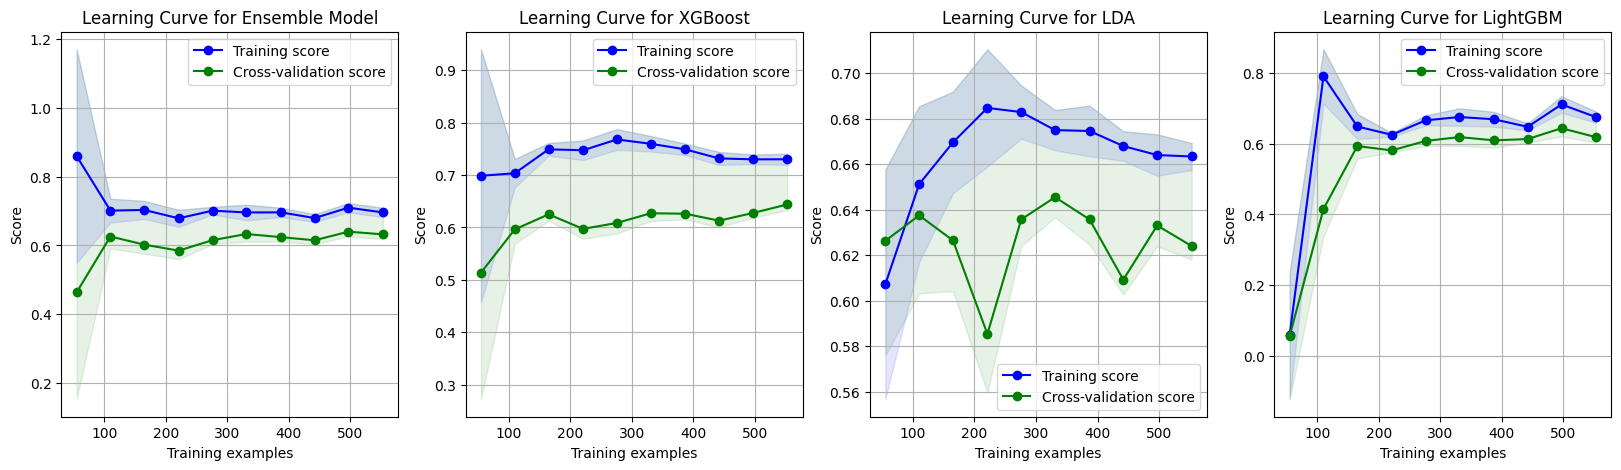

In [ ]:
plt.figure(figsize=(20,5))

# "std_display_style": "fill_between
# LDA
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, Y, cv=10, scoring='precision', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.subplot(1,4,3)
plt.plot(train_sizes, train_scores_mean, 'o-',color='b',label='Training score')
plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std,color = 'b',alpha = 0.1)
plt.plot(train_sizes, test_scores_mean, 'o-',color='g',label='Cross-validation score')
plt.fill_between(train_sizes, test_scores_mean-train_scores_std, train_scores_mean+train_scores_std, color = 'g',alpha = 0.1)

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for LDA")
plt.legend(loc="best")
plt.grid(True)


#XGBoost
train_sizes, train_scores, test_scores = learning_curve(
    xgboost, X, Y, cv=10, scoring='precision', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.subplot(1,4,2)
plt.plot(train_sizes, train_scores_mean, 'o-',color='b',label='Training score')
plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std,color = 'b',alpha = 0.1)
plt.plot(train_sizes, test_scores_mean, 'o-',color='g',label='Cross-validation score')
plt.fill_between(train_sizes, test_scores_mean-train_scores_std, train_scores_mean+train_scores_std, color = 'g',alpha = 0.1)

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for XGBoost")
plt.legend(loc="best")
plt.grid(True)


#LightGBM
train_sizes, train_scores, test_scores = learning_curve(
    model, X, Y, cv=10, scoring='precision', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.subplot(1,4,4)
plt.plot(train_sizes, train_scores_mean, 'o-',color='b',label='Training score')
plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std,color = 'b',alpha = 0.1)
plt.plot(train_sizes, test_scores_mean, 'o-',color='g',label='Cross-validation score')
plt.fill_between(train_sizes, test_scores_mean-train_scores_std, train_scores_mean+train_scores_std, color = 'g',alpha = 0.1)

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for LightGBM")
plt.legend(loc="best")
plt.grid(True)

#LightGBM

train_sizes, train_scores, test_scores = learning_curve(
    ensemble_model, X, Y, cv=10, scoring='precision', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.subplot(1,4,1)
plt.plot(train_sizes, train_scores_mean, 'o-',color='b',label='Training score')
plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std,color = 'b',alpha = 0.1)
plt.plot(train_sizes, test_scores_mean, 'o-',color='g',label='Cross-validation score')
plt.fill_between(train_sizes, test_scores_mean-train_scores_std, train_scores_mean+train_scores_std, color = 'g',alpha = 0.1)

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for Ensemble Model")
plt.legend(loc="best")
plt.grid(True)


plt.show()








# F1-Score

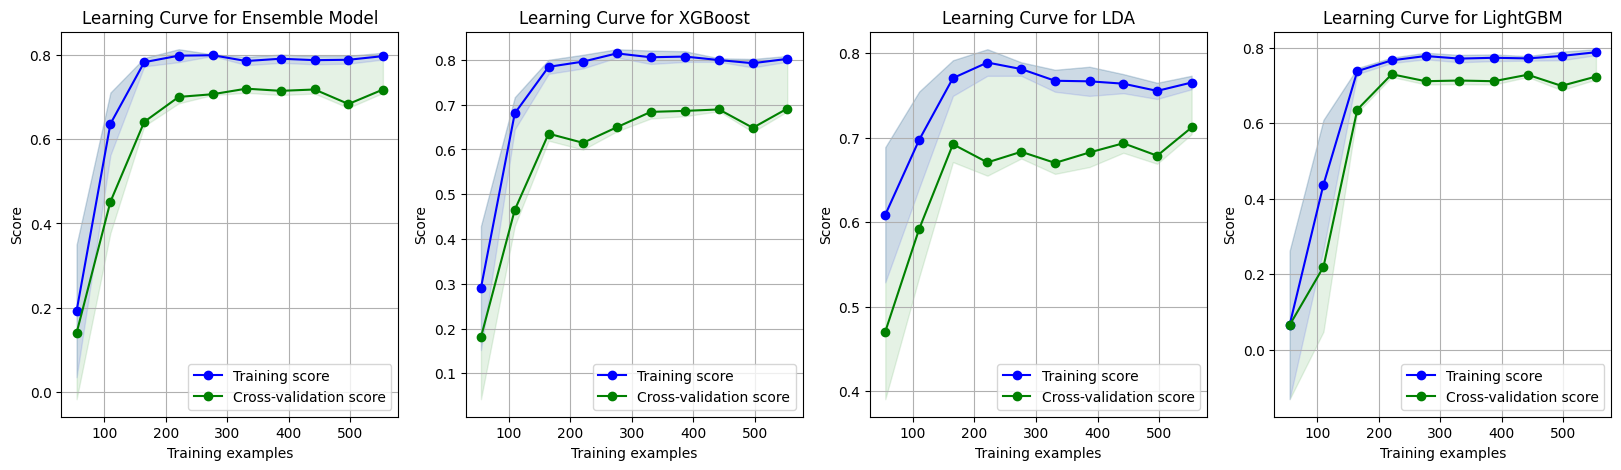

In [ ]:
  plt.figure(figsize=(20,5))

  # "std_display_style": "fill_between
  # LDA
  train_sizes, train_scores, test_scores = learning_curve(
      estimator, X, Y, cv=10, scoring='f1', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
  )

  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  plt.subplot(1,4,3)
  plt.plot(train_sizes, train_scores_mean, 'o-',color='b',label='Training score')
  plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std,color = 'b',alpha = 0.1)
  plt.plot(train_sizes, test_scores_mean, 'o-',color='g',label='Cross-validation score')
  plt.fill_between(train_sizes, test_scores_mean-train_scores_std, train_scores_mean+train_scores_std, color = 'g',alpha = 0.1)

  plt.xlabel("Training examples")
  plt.ylabel("Score")
  plt.title("Learning Curve for LDA")
  plt.legend(loc="best")
  plt.grid(True)


  #XGBoost
  train_sizes, train_scores, test_scores = learning_curve(
      xgboost, X, Y, cv=10, scoring='f1', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
  )

  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  plt.subplot(1,4,2)
  plt.plot(train_sizes, train_scores_mean, 'o-',color='b',label='Training score')
  plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std,color = 'b',alpha = 0.1)
  plt.plot(train_sizes, test_scores_mean, 'o-',color='g',label='Cross-validation score')
  plt.fill_between(train_sizes, test_scores_mean-train_scores_std, train_scores_mean+train_scores_std, color = 'g',alpha = 0.1)

  plt.xlabel("Training examples")
  plt.ylabel("Score")
  plt.title("Learning Curve for XGBoost")
  plt.legend(loc="best")
  plt.grid(True)


  #LightGBM
  train_sizes, train_scores, test_scores = learning_curve(
      model, X, Y, cv=10, scoring='f1', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
  )

  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  plt.subplot(1,4,4)
  plt.plot(train_sizes, train_scores_mean, 'o-',color='b',label='Training score')
  plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std,color = 'b',alpha = 0.1)
  plt.plot(train_sizes, test_scores_mean, 'o-',color='g',label='Cross-validation score')
  plt.fill_between(train_sizes, test_scores_mean-train_scores_std, train_scores_mean+train_scores_std, color = 'g',alpha = 0.1)

  plt.xlabel("Training examples")
  plt.ylabel("Score")
  plt.title("Learning Curve for LightGBM")
  plt.legend(loc="best")
  plt.grid(True)

  #LightGBM

  train_sizes, train_scores, test_scores = learning_curve(
      ensemble_model, X, Y, cv=10, scoring='f1', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
  )

  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  plt.subplot(1,4,1)
  plt.plot(train_sizes, train_scores_mean, 'o-',color='b',label='Training score')
  plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std,color = 'b',alpha = 0.1)
  plt.plot(train_sizes, test_scores_mean, 'o-',color='g',label='Cross-validation score')
  plt.fill_between(train_sizes, test_scores_mean-train_scores_std, train_scores_mean+train_scores_std, color = 'g',alpha = 0.1)

  plt.xlabel("Training examples")
  plt.ylabel("Score")
  plt.title("Learning Curve for Ensemble Model")
  plt.legend(loc="best")
  plt.grid(True)


  plt.show()








## Recall

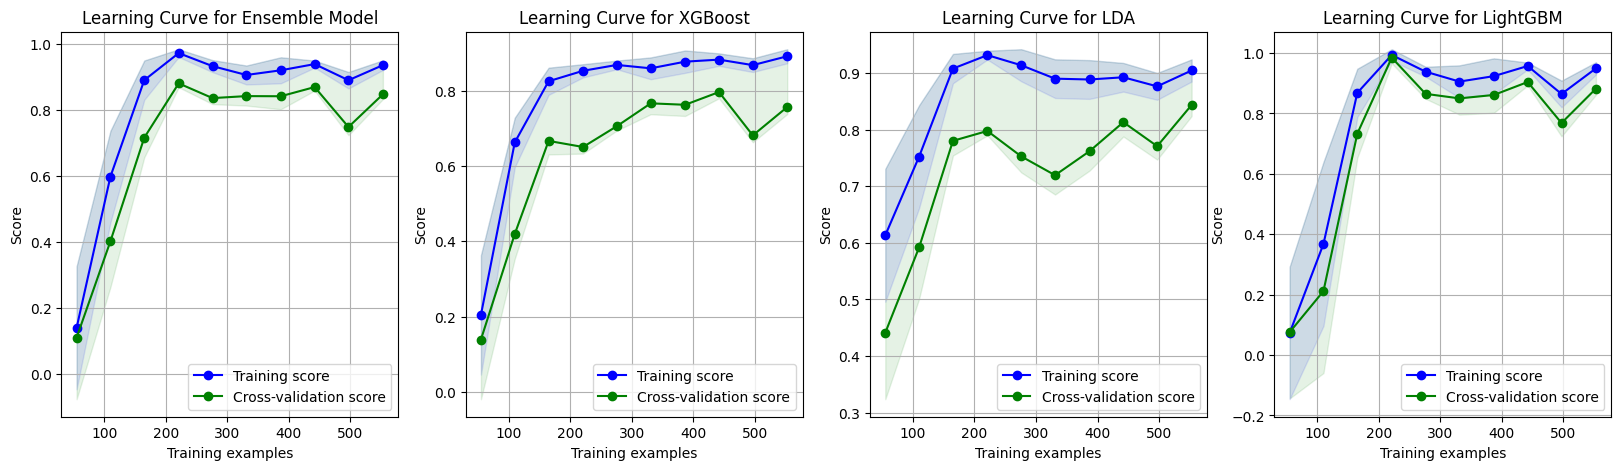

In [ ]:
plt.figure(figsize=(20,5))

# "std_display_style": "fill_between
# LDA
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, Y, cv=10, scoring='recall', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.subplot(1,4,3)
plt.plot(train_sizes, train_scores_mean, 'o-',color='b',label='Training score')
plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std,color = 'b',alpha = 0.1)
plt.plot(train_sizes, test_scores_mean, 'o-',color='g',label='Cross-validation score')
plt.fill_between(train_sizes, test_scores_mean-train_scores_std, train_scores_mean+train_scores_std, color = 'g',alpha = 0.1)

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for LDA")
plt.legend(loc="best")
plt.grid(True)


#XGBoost
train_sizes, train_scores, test_scores = learning_curve(
    xgboost, X, Y, cv=10, scoring='recall', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.subplot(1,4,2)
plt.plot(train_sizes, train_scores_mean, 'o-',color='b',label='Training score')
plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std,color = 'b',alpha = 0.1)
plt.plot(train_sizes, test_scores_mean, 'o-',color='g',label='Cross-validation score')
plt.fill_between(train_sizes, test_scores_mean-train_scores_std, train_scores_mean+train_scores_std, color = 'g',alpha = 0.1)

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for XGBoost")
plt.legend(loc="best")
plt.grid(True)


#LightGBM
train_sizes, train_scores, test_scores = learning_curve(
    model, X, Y, cv=10, scoring='recall', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.subplot(1,4,4)
plt.plot(train_sizes, train_scores_mean, 'o-',color='b',label='Training score')
plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std,color = 'b',alpha = 0.1)
plt.plot(train_sizes, test_scores_mean, 'o-',color='g',label='Cross-validation score')
plt.fill_between(train_sizes, test_scores_mean-train_scores_std, train_scores_mean+train_scores_std, color = 'g',alpha = 0.1)

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for LightGBM")
plt.legend(loc="best")
plt.grid(True)

#LightGBM

train_sizes, train_scores, test_scores = learning_curve(
    ensemble_model, X, Y, cv=10, scoring='recall', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.subplot(1,4,1)
plt.plot(train_sizes, train_scores_mean, 'o-',color='b',label='Training score')
plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std,color = 'b',alpha = 0.1)
plt.plot(train_sizes, test_scores_mean, 'o-',color='g',label='Cross-validation score')
plt.fill_between(train_sizes, test_scores_mean-train_scores_std, train_scores_mean+train_scores_std, color = 'g',alpha = 0.1)

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for Ensemble Model")
plt.legend(loc="best")
plt.grid(True)


plt.show()








# LogLoss

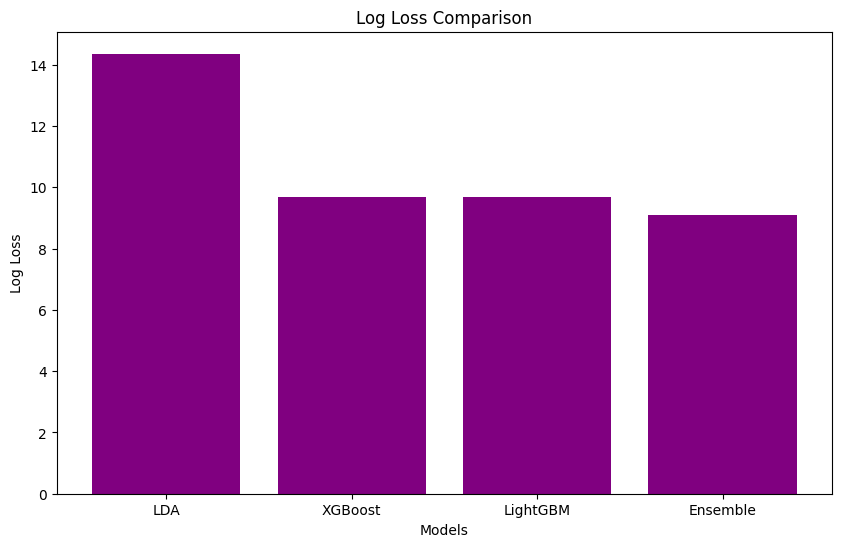

In [ ]:
from sklearn.metrics import log_loss
logloss_ensemble = log_loss(Y_prediction_ensemble,Y_test)
logloss_xgb = log_loss(Y_prediction_XGB,Y_test)
logloss_lda = log_loss(Y_prediction_lda,Y_test)
logloss_lgb = log_loss(Y_prediction_lgb,Y_test)
models = ['LDA', 'XGBoost', 'LightGBM', 'Ensemble']
plt.figure(figsize=(10,6))
plt.bar(models,[logloss_lda,logloss_xgb,logloss_lgb,logloss_ensemble],color = 'purple')
plt.xlabel('Models')
plt.ylabel('Log Loss')
plt.title('Log Loss Comparison')
plt.show()

In [ ]:
print('LDA:',logloss_lda)
print('XGBoost:',logloss_xgb)
print('LightGBM:',logloss_lgb)
print('Ensemble:',logloss_ensemble)

NameError: name 'logloss_lda' is not defined

# Brier Score Loss

In [ ]:
from sklearn.metrics import brier_score_loss
bs_xgboost = brier_score_loss(Y_test,Y_prediction_XGB)
bs_lda = brier_score_loss(Y_test,Y_prediction_lda)
bs_lightgbm =  brier_score_loss(Y_test,Y_prediction_lgb)
bs_ensemble = brier_score_loss(Y_test,Y_prediction_ensemble)

print('XGBoost:',bs_xgboost)
print('LDA:',bs_lda)
print('LightGBM:',bs_lightgbm)
print('Ensemble:',bs_ensemble)

XGBoost: 0.2682926829268293
LDA: 0.3983739837398374
LightGBM: 0.2682926829268293
Ensemble: 0.25203252032520324


# Mutual Information

In [ ]:
from sklearn.metrics import mutual_info_score
mi_xgb = mutual_info_score(Y_test,Y_prediction_XGB)
mi_lda = mutual_info_score(Y_test,Y_prediction_lda)
mi_lgb = mutual_info_score(Y_test,Y_prediction_lgb)
mi_ensemble = mutual_info_score(Y_test,Y_prediction_ensemble)

print('XGBoost:',mi_xgb)
print('LDA:',mi_lda)
print('LightGBM:',mi_lgb)
print('Ensemble:',mi_ensemble)

XGBoost: 0.09592678078652375
LDA: 0.04329153616755674
LightGBM: 0.08077909907079414
Ensemble: 0.13345115637916818


# Marginal Contribution

In [ ]:
def calc_mc(models,X,Y):
  from sklearn.model_selection import cross_val_predict
  marginal_contributions = {}

  for name,model in models:
    cv_predictions = cross_val_predict(model,X,Y,cv=10)
    marginal_contribution = np.mean(cv_predictions != Y)
    marginal_contributions[name] = marginal_contribution
    print(f"{name}: {marginal_contribution}")
calc_mc([('xgb', xgboost), ('lda', estimator),('lgbm',model),('ensemble',ensemble_model)],X,Y)

xgb: 0.36633663366336633
lda: 0.38943894389438943
lgbm: 0.3564356435643564
ensemble: 0.3580858085808581


# Prediction variance

In [ ]:
def calc_pv(models,X,Y,X_train,Y_train,X_test,Y_test):
  from sklearn.model_selection import cross_val_predict
  prediction_variance = {}

  for name,model in models:
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    prediction_variance[name] = np.var(Y_pred)
    print(f"{name}: {prediction_variance[name]}")

calc_pv([('xgb', xgboost), ('lda', estimator),('lgbm',model),('ensemble',ensemble_model)],X,Y,X_train,Y_train,X_test,Y_test)

xgb: 0.22037086804622413
lda: 0.17683418435904324
lgbm: 0.20102123085192156
ensemble: 0.20800859983875306


# Feature Importance using permutation importance

In [ ]:
from sklearn.inspection import permutation_importance

feature_names = X_test.columns
result = permutation_importance(
    ensemble_model, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2
)

pi_ensemble = pd.DataFrame({
    'Features':feature_names, 'Importance':result.importances_mean
    })

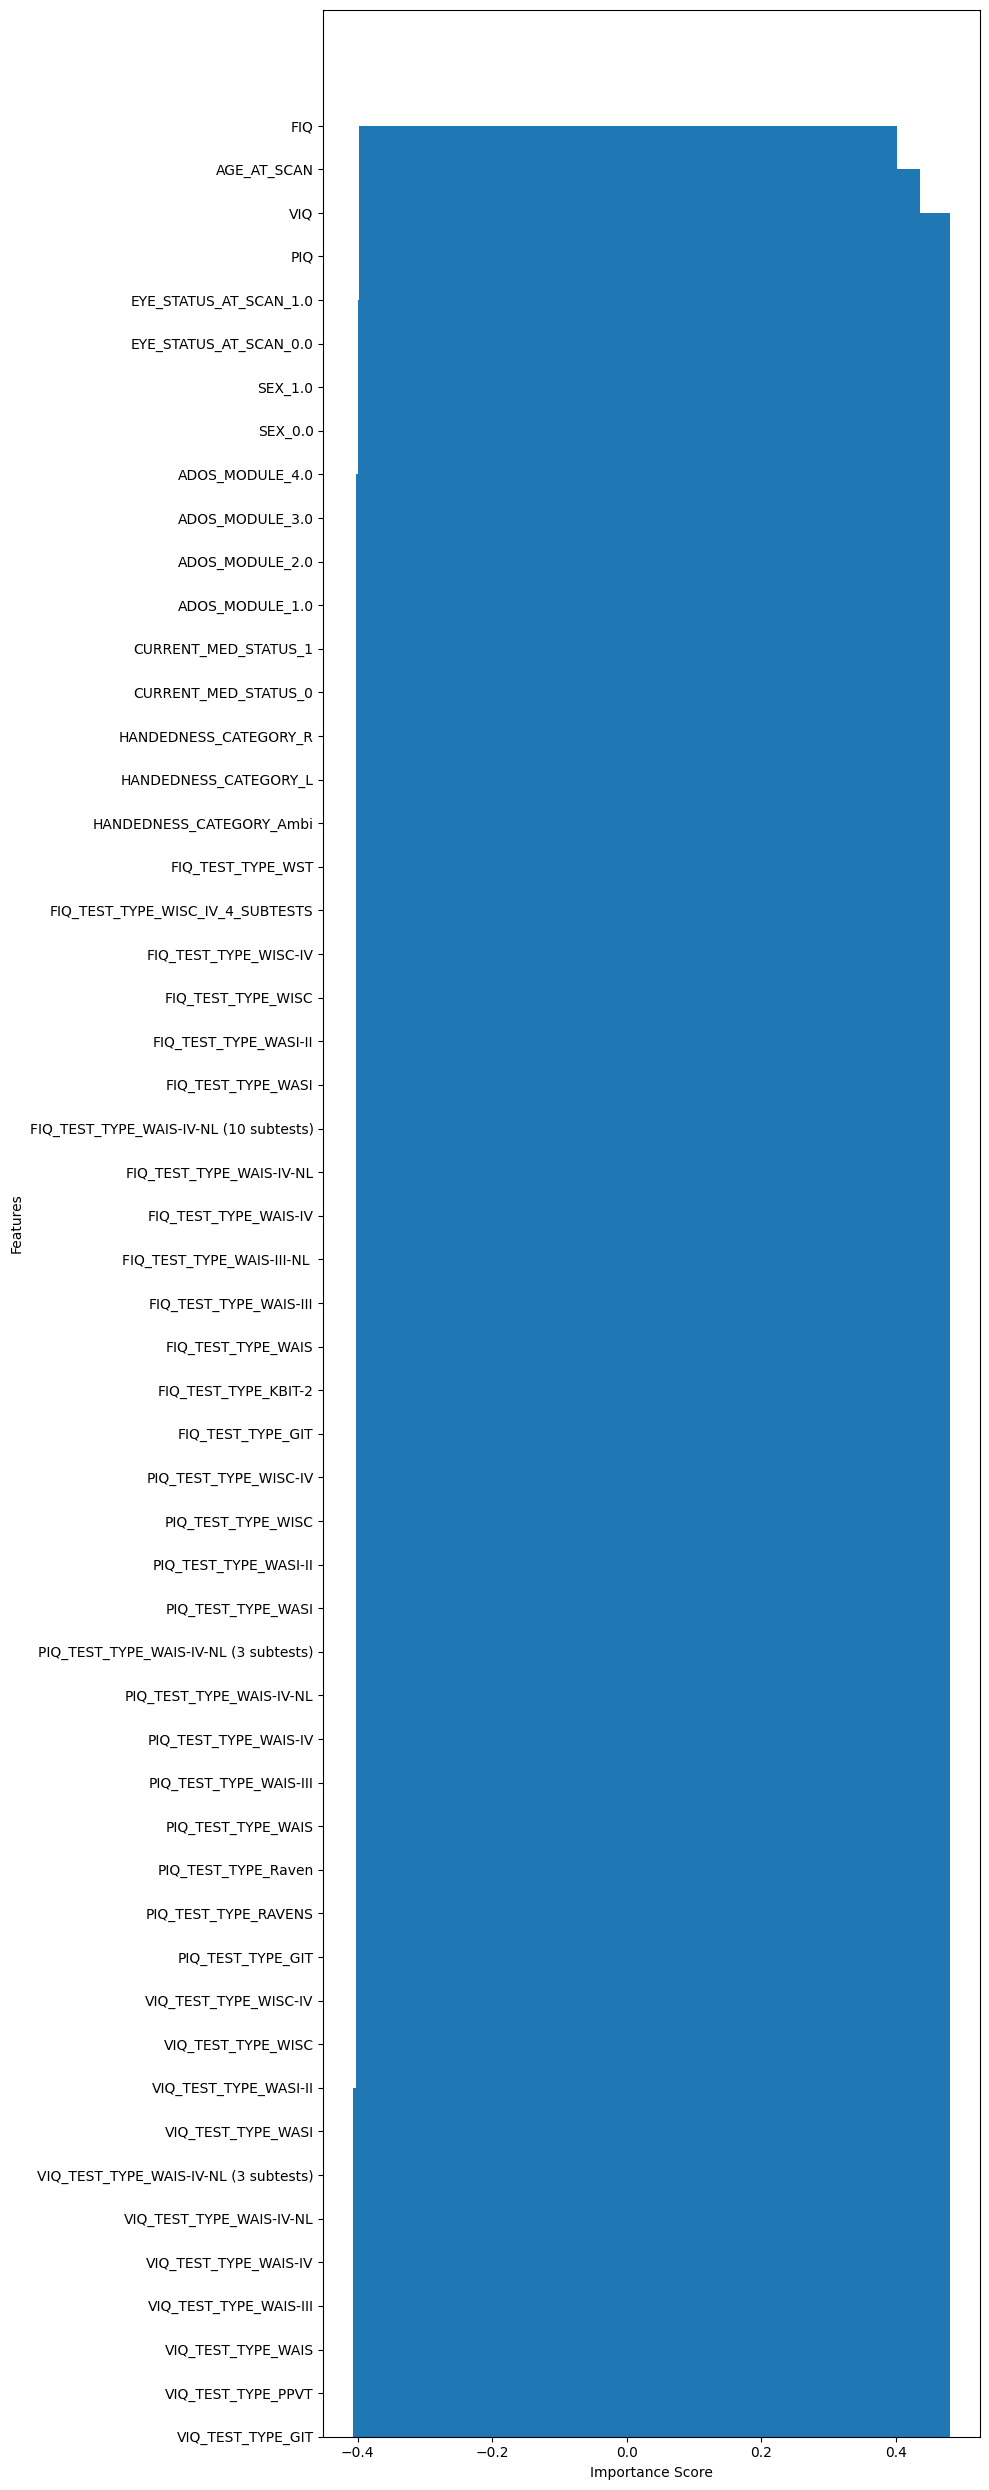

In [ ]:
plt.figure(figsize=(10,25))
x_positions = np.arange(len(feature_names))
plt.bar(result.importances_mean,feature_names, width=0.8)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()

In [ ]:
pi_ensemble[pi_ensemble['Features'] == 'FIQ']['Importance']

,Importance
53,0.001639


Text(0, 0.5, 'Features')

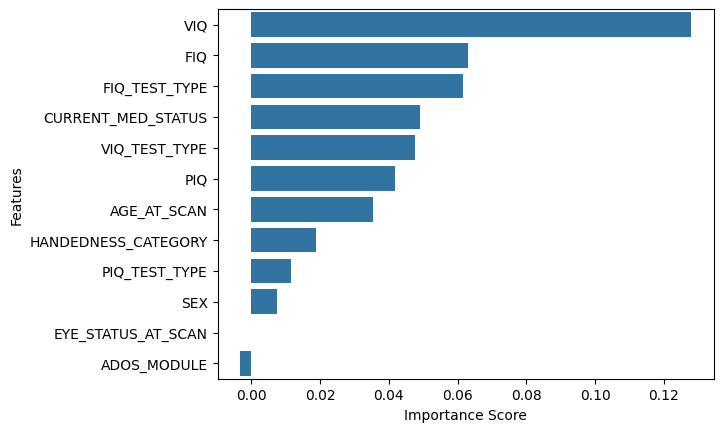

In [ ]:
features = ['AGE_AT_SCAN','PIQ','VIQ','FIQ','FIQ_TEST_TYPE','PIQ_TEST_TYPE','VIQ_TEST_TYPE','HANDEDNESS_CATEGORY','CURRENT_MED_STATUS','EYE_STATUS_AT_SCAN','ADOS_MODULE','SEX']
pi_dict = dict()
for feature in features:
  if feature != 'PIQ' or feature != 'VIQ' or feature != 'FIQ':
    pi_dict[feature] = pi_ensemble[pi_ensemble['Features'].str.startswith(feature)]['Importance'].sum()
  else:
    pi_dict[feature] = pi_ensemble[pi_ensemble['Features']==feature]['Importance']
d = {'Features':features,'Importance':list(pi_dict.values())}
pi_ensemble_final = pd.DataFrame(d)
pi_ensemble_final = pi_ensemble_final.sort_values(by="Importance", ascending=False)
#pi_ensemble_final
pi_ensemble_final.sort_values(by="Importance", ascending=False)
sns.barplot(pi_ensemble_final,x = 'Importance',y = 'Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')

# Precision Recall Curve

<Figure size 1000x600 with 0 Axes>

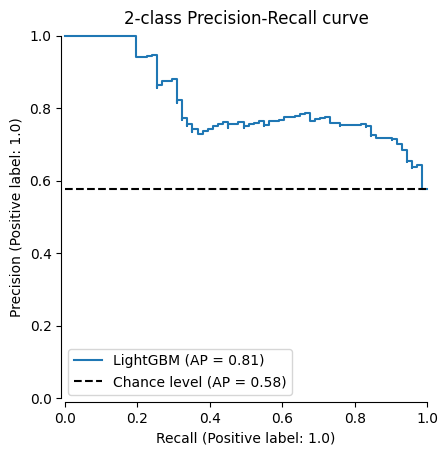

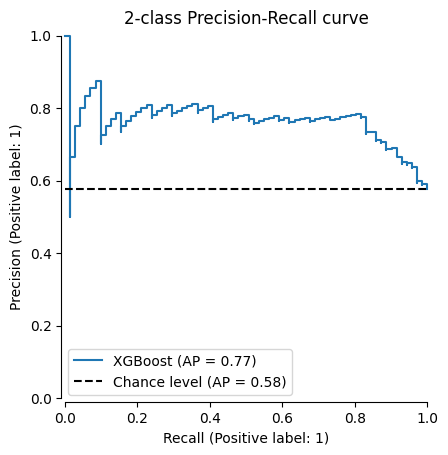

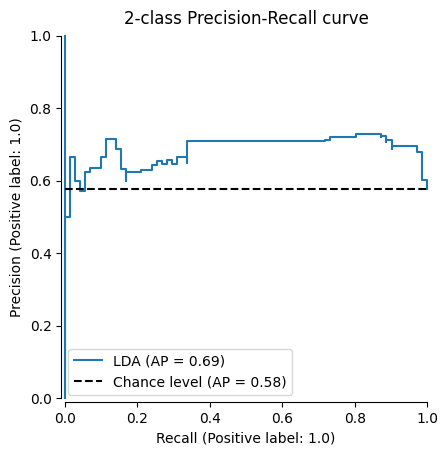

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

plt.figure(figsize=(10,6))

display = PrecisionRecallDisplay.from_estimator(
    model, X_test, Y_test, name="LightGBM", plot_chance_level=True, despine=True
)
displayxgb = PrecisionRecallDisplay.from_estimator(
    xgboost, X_test, Y_test, name="XGBoost", plot_chance_level=True, despine=True
)
displaylda = PrecisionRecallDisplay.from_estimator(
     estimator, X_test_selected, Y_test, name="LDA", plot_chance_level=True, despine=True
)

_ = display.ax_.set_title("2-class Precision-Recall curve")
_ = displayxgb.ax_.set_title("2-class Precision-Recall curve")
_ = displaylda.ax_.set_title("2-class Precision-Recall curve")

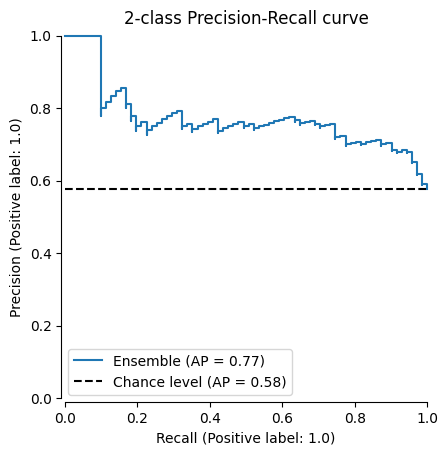

In [ ]:
ensemble_model_new = VotingClassifier(estimators=[('xgb', xgboost), ('lda', estimator),('lgbm',model)], voting='soft')
ensemble_model_new.fit(X_train, Y_train)

display_ensemble = PrecisionRecallDisplay.from_estimator(
    ensemble_model_new, X_test, Y_test, name="Ensemble", plot_chance_level=True, despine=True
)
_ = display_ensemble.ax_.set_title("2-class Precision-Recall curve")

# SHAP Values

In [ ]:
import shap
explainer = shap.Explainer(xgboost)
shap_values = explainer.shap_values(X_test)

In [ ]:
df_shap = pd.DataFrame(shap_values,columns=feature_names)
df_shap

,VIQ_TEST_TYPE_GIT,VIQ_TEST_TYPE_PPVT,VIQ_TEST_TYPE_WAIS,VIQ_TEST_TYPE_WAIS-III,VIQ_TEST_TYPE_WAIS-IV,VIQ_TEST_TYPE_WAIS-IV-NL,VIQ_TEST_TYPE_WAIS-IV-NL (3 subtests),VIQ_TEST_TYPE_WASI,VIQ_TEST_TYPE_WASI-II,VIQ_TEST_TYPE_WISC,...,ADOS_MODULE_3.0,ADOS_MODULE_4.0,SEX_0.0,SEX_1.0,EYE_STATUS_AT_SCAN_0.0,EYE_STATUS_AT_SCAN_1.0,FIQ,VIQ,AGE_AT_SCAN,PIQ
0,0.0,0.0,0.0,0.461427,0.0,0.0,0.0,-0.199428,-0.028211,0.0,...,0.0,0.0,-0.028716,0.0,0.010225,0.0,-0.363311,-0.094258,0.187950,0.163847
1,0.0,0.0,0.0,-0.028887,0.0,0.0,0.0,0.051746,-0.013382,0.0,...,0.0,0.0,-0.029756,0.0,0.011774,0.0,-0.031007,0.059838,-0.020826,0.108969
2,0.0,0.0,0.0,-0.035383,0.0,0.0,0.0,-0.302634,-0.058100,0.0,...,0.0,0.0,0.086304,0.0,0.019227,0.0,-0.443889,-0.436523,-0.218134,-0.390816
3,0.0,0.0,0.0,0.589050,0.0,0.0,0.0,-0.404880,-0.045912,0.0,...,0.0,0.0,0.150388,0.0,-0.014975,0.0,-0.040829,0.186175,0.088959,-0.094977
4,0.0,0.0,0.0,-0.029457,0.0,0.0,0.0,0.063620,-0.014055,0.0,...,0.0,0.0,-0.013043,0.0,0.018762,0.0,0.015231,0.074328,-0.285891,0.116633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.0,0.0,0.0,-0.043656,0.0,0.0,0.0,0.012107,-0.014033,0.0,...,0.0,0.0,-0.024798,0.0,-0.008439,0.0,-0.609124,-0.801700,-0.232745,-0.292429
119,0.0,0.0,0.0,-0.025756,0.0,0.0,0.0,0.157829,-0.020581,0.0,...,0.0,0.0,-0.025244,0.0,-0.011221,0.0,0.125071,0.097675,0.116413,0.135514
120,0.0,0.0,0.0,-0.025831,0.0,0.0,0.0,0.128929,-0.019856,0.0,...,0.0,0.0,-0.018847,0.0,0.007341,0.0,0.164257,-0.156937,0.085999,0.009014
121,0.0,0.0,0.0,-0.034779,0.0,0.0,0.0,-0.336705,-0.058100,0.0,...,0.0,0.0,-0.018459,0.0,0.020075,0.0,-0.418923,-0.746421,0.073551,0.079101


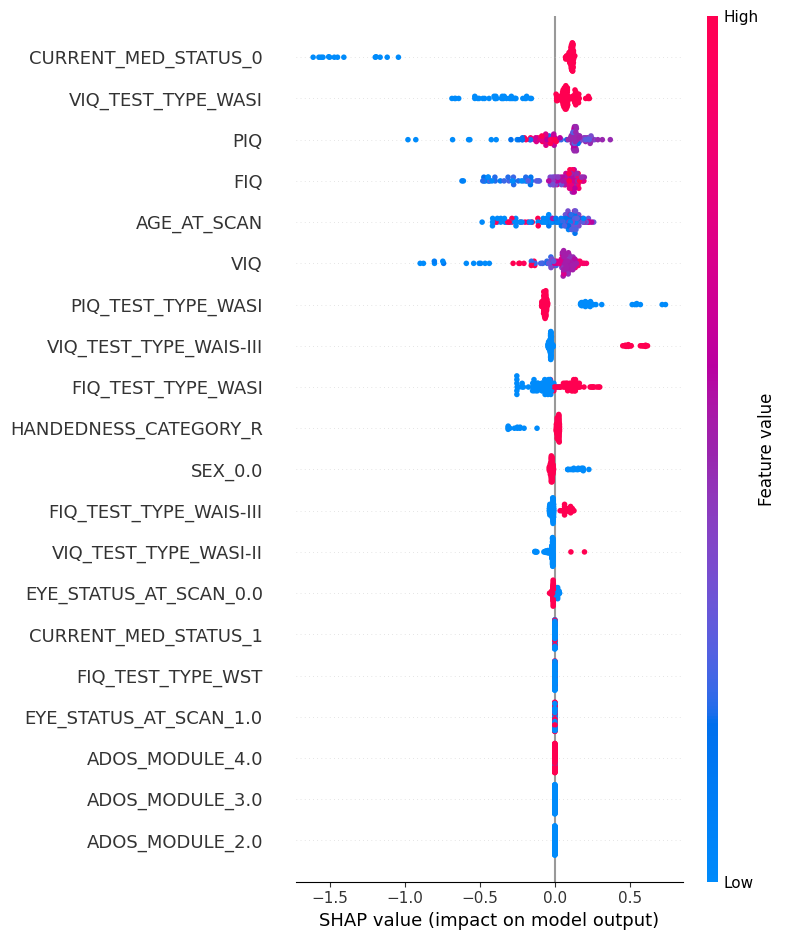

In [ ]:
shap.summary_plot(shap_values, X_test)